In [1]:
n_sigma_cut = 0.5 # main force for the PID

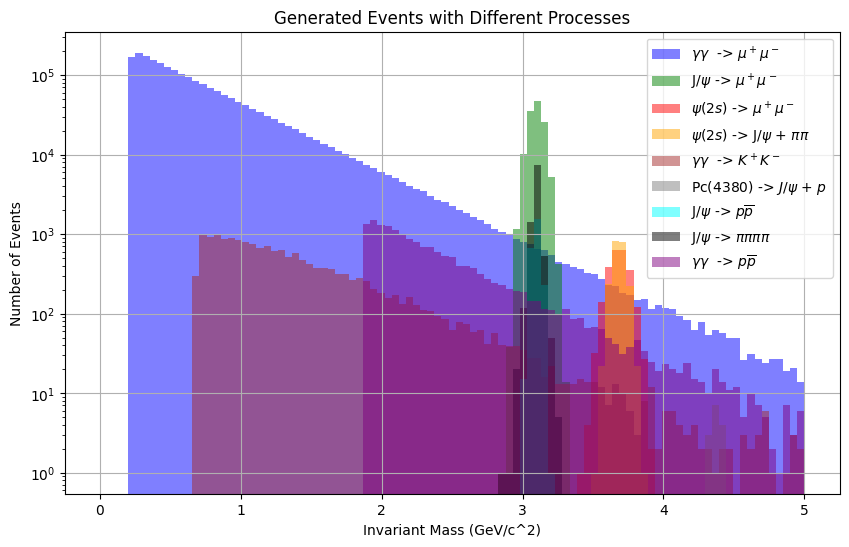

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Event generation parameters
n_photon_photon = 2144429
n_jpsi = 124800
n_psi2S_muons = 2320
n_psi2S_jpsi_pions = 2120
n_pq1 = 14
#n_pq2 = 25
n_pp_kaon = 16920
n_jpsi_protons = 2440
n_jpsi_4pi = 9470
#n_jpsi_3pi = 500
n_photon_photon_proton = 16693 #Run 2 numbers

# Constants (GeV/c^2)
m_muon = 0.105658  # Muon mass
m_jpsi = 3.0969    # J/psi mass
m_psi2S = 3.6861   # Psi(2S) mass
m_pion = 0.13957   # Charged pion mass
m_proton= .938 
m_pentaquark= 4.38
m_electron= .0005
n_pentaquark= 10000
m_kaon= 0.49367
m_rho = 0.775

def isotropic_two_body_decay(mother_mass, daughter_mass1, daughter_mass2):
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    p = tpc_momentum_resolution(p)
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution(momentum):
    a = 0.005
    b = 0.01
    resolution = np.sqrt(a**2 + (b * momentum)**2)
    smeared_momentum = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum

def generate_photon_photon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_muon  # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(mass, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, E1, E2 = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_psi2S_muons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        muon1_p, muon2_p, _, _ = isotropic_two_body_decay(m_psi2S, m_muon, m_muon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_psi2S_jpsi_pions_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        jpsi_p, pion_p, jpsi_E, pion_E = isotropic_two_body_decay(m_psi2S, m_jpsi, 2 * m_pion)
        muon1_p, muon2_p, muon1_E, muon2_E = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        # jpsi_p = tpc_momentum_resolution(np.linalg.norm(jpsi_p))
        # pion_p = tpc_momentum_resolution(np.linalg.norm(pion_p))
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(muon1_p)
        smearedTracks.append(muon2_p)
        smearedTracks.append(pion_p)
        smearedTracks.append(pion_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def generate_jpsi_protons_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        proton1_p, proton2_p, _, _ = isotropic_two_body_decay(m_jpsi, m_proton, m_proton)
        # proton1_p = tpc_momentum_resolution(np.linalg.norm(proton1_p))
        # proton2_p = tpc_momentum_resolution(np.linalg.norm(proton2_p))
        smearedTracks.append(proton1_p)
        smearedTracks.append(proton2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)
#generate_jpsi_protons_events(n_events)

def generate_pp_kaon_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_kaon + 0.2 # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        pp_kaon1_p, pp_kaon2_p, _, _ = isotropic_two_body_decay(mass, m_kaon, m_kaon)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(pp_kaon1_p)
        smearedTracks.append(pp_kaon2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

#-----------New gamma + gamma -> proton + proton

def generate_photon_photon_proton_events(n_events):
    masses = np.random.exponential(0.5, n_events) + 2 * m_proton # Invariant mass distribution
    events = []
    for mass in masses:
        smearedTracks = []
        proton1_p, proton2_p, _, _ = isotropic_two_body_decay(mass, m_proton, m_proton)
        # muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p))
        # muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p))
        smearedTracks.append(proton1_p)
        smearedTracks.append(proton2_p)
        events.append(smearedTracks)
        # events.append(mass)
    return np.array(events)

def isotropic_three_body_decay(mother_mass, daughter_mass1, daughter_mass2, daughter_mass3):
    """
    Simulates an isotropic three-body decay, distributing energy and momentum according to phase space constraints.
    Returns the momenta and energies of the three daughter particles.
    """
    # Total energy available for distribution after accounting for minimum required energy
    total_energy_available = (mother_mass - daughter_mass1 - daughter_mass2 - daughter_mass3)
    
    if total_energy_available <= 0:
        raise ValueError("Insufficient mass for a three-body decay.")

    # Randomly divide the available energy between the three daughters
    available_energy1 = np.random.uniform(0, total_energy_available)
    available_energy2 = np.random.uniform(0, total_energy_available - available_energy1)
    available_energy3 = total_energy_available - available_energy1 - available_energy2
    
    E1 = daughter_mass1 + available_energy1
    E2 = daughter_mass2 + available_energy2
    E3 = daughter_mass3 + available_energy3

    # Compute the momenta from the energies
    p1 = np.sqrt(E1**2 - daughter_mass1**2)
    p2 = np.sqrt(E2**2 - daughter_mass2**2)
    p3 = np.sqrt(E3**2 - daughter_mass3**2)
    
    # Random angles for isotropic decay
    theta1 = np.arccos(2 * np.random.rand() - 1)
    phi1 = 2 * np.pi * np.random.rand()
    
    theta2 = np.arccos(2 * np.random.rand() - 1)
    phi2 = 2 * np.pi * np.random.rand()
    
    # Calculate the momenta in 3D (isotropic decay)
    p1_vec = np.array([p1 * np.sin(theta1) * np.cos(phi1), p1 * np.sin(theta1) * np.sin(phi1), p1 * np.cos(theta1)])
    p2_vec = np.array([p2 * np.sin(theta2) * np.cos(phi2), p2 * np.sin(theta2) * np.sin(phi2), p2 * np.cos(theta2)])
    p3_vec = -p1_vec - p2_vec  # Momentum conservation
    
    return p1_vec, p2_vec, p3_vec, E1, E2, E3


def boost_to_lab_frame(momentum, boost_vector):
    """
    Boosts the momentum of a particle to the lab frame using the boost vector.
    """
    # Check if the boost vector is effectively zero (no boost needed)
    if np.linalg.norm(boost_vector) < 1e-10:
        print("error1")
        return momentum
    
    beta = boost_vector / np.linalg.norm(boost_vector)
    beta_norm_sq = np.linalg.norm(beta)**2
    
    # Ensure that beta_norm_sq < 1 (speed of light constraint)
    if beta_norm_sq >= 1.0:
        print("error2")
        return momentum  # No valid boost
    
    gamma = 1.0 / np.sqrt(1 - beta_norm_sq)
    dot_product = np.dot(momentum, beta)
    energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
    
    boosted_energy = gamma * (energy + dot_product)
    boosted_momentum = momentum + (gamma - 1) * dot_product / beta_norm_sq * beta + gamma * energy * beta
    
    return boosted_momentum

def boost_along_axis(momentum, beta, axis):
    """
    Boosts a particle along a single axis.
    
    Parameters:
    - momentum: 3D momentum vector of the particle to be boosted
    - beta: velocity (as a fraction of the speed of light) along the chosen axis
    - axis: axis along which to boost ('x', 'y', or 'z')
    
    Returns:
    - boosted_momentum: the 3D momentum vector after the boost along the given axis
    """
    if abs(beta) >= 1:
        print("error2")
        raise ValueError("Beta must be less than 1 for a valid boost.")
    
    gamma = 1.0 / np.sqrt(1 - beta**2)
    
    # Boost along the x-axis
    if axis == 'x':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_px = gamma * (momentum[0] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[0])
        boosted_momentum = np.array([boosted_px, momentum[1], momentum[2]])
    
    # Boost along the y-axis
    elif axis == 'y':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_py = gamma * (momentum[1] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[1])
        boosted_momentum = np.array([momentum[0], boosted_py, momentum[2]])
    
    # Boost along the z-axis
    elif axis == 'z':
        energy = np.sqrt(np.linalg.norm(momentum)**2 + m_muon**2)
        boosted_pz = gamma * (momentum[2] + beta * energy)
        boosted_energy = gamma * (energy + beta * momentum[2])
        boosted_momentum = np.array([momentum[0], momentum[1], boosted_pz])
    
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'.")
    
    return boosted_momentum, boosted_energy

def boost_to_lab_frame_separate(momentum, boost_vector):
    """
    Boosts the particle's 3D momentum vector using separate boosts along the x, y, and z axes.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - boost_vector: 3D velocity vector (as a fraction of the speed of light)
    
    Returns:
    - boosted_momentum: the 3D momentum vector after boosting along x, y, and z
    """
    boosted_momentum = momentum
    # Boost along x
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[0], 'x')
    # Boost along y
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[1], 'y')
    # Boost along z
    boosted_momentum, _ = boost_along_axis(boosted_momentum, boost_vector[2], 'z')
    
    px, py, pz = boosted_momentum
    p_total = np.sqrt(px**2 + py**2 + pz**2)
    
    # Calculate new theta (polar angle)
    theta_prime = np.arccos(pz / p_total) if p_total > 0 else 0.0
    
    # Calculate new phi (azimuthal angle)
    phi_prime = np.arctan2(py, px)

    return boosted_momentum, theta_prime, phi_prime


def generate_psi2S_jpsi_pions_events_fixed(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay(m_jpsi, m_muon, m_muon)
        
        # Boost the muons back to the lab frame using the momentum of the J/psi from Step 1
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        smearedTracks.append(muon1_p_lab)
        smearedTracks.append(muon2_p_lab)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

def isotropic_two_body_decay_no_smearing(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay without smearing.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    return p1, p2, E1, E2

def tpc_momentum_resolution_3d(momentum_vec):
    """
    Applies TPC momentum resolution smearing to each component of the momentum vector.
    """
    smeared_momentum_vec = np.zeros(3)
    for i in range(3):
        momentum = momentum_vec[i]
        a = 0.005
        b = 0.01
        resolution = np.sqrt(a**2 + (b * momentum)**2)
        smeared_momentum_vec[i] = momentum * (1 + np.random.normal(0, resolution))
    return smeared_momentum_vec

def generate_psi2S_jpsi_pions_events_smearing_after_boost(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (without smearing)
        muon1_p_rest, muon2_p_rest, _, _ = isotropic_two_body_decay_no_smearing(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        muon1_p_lab = boost_to_lab_frame(muon1_p_rest, jpsi_p)
        muon2_p_lab = boost_to_lab_frame(muon2_p_rest, jpsi_p)
        
        # Step 4: Apply smearing to the muons after boosting to the lab frame (component-wise)
        muon1_p_lab_smeared = tpc_momentum_resolution_3d(muon1_p_lab)
        muon2_p_lab_smeared = tpc_momentum_resolution_3d(muon2_p_lab)
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        events.append(smearedTracks)
    
    return np.array(events)

# def plot_event_distribution(events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions, events_jpsi_protons, events_pp_kaons, events_pq):
#     plt.figure(figsize=(10, 6))
#     bins = np.linspace(0, 5, 100)
#     plt.hist(events_photon_photon, bins, alpha=0.5, label='Photon+Photon -> 2 muons', color='blue')
#     plt.hist(events_jpsi, bins, alpha=0.5, label='J/psi -> 2 muons', color='green')
#     plt.hist(events_psi2S_muons, bins, alpha=0.5, label='psi(2S) -> 2 muons', color='red')
#     plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label='psi(2S) -> J/psi + 2 pions', color='orange')
#     plt.hist(events_jpsi_protons, bins, alpha=0.5, label='J/psi -> 2 protons', color='cyan')
#     plt.hist(events_pp_kaons, bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='brown')
#     plt.hist(events_pq, bins, alpha=0.5, label='pentaquark(2S) -> J/psi + 1 proton', color='gray')
#     plt.xlabel('Invariant Mass (GeV/c^2)')
#     plt.yscale('log')  # Log scale for y-axis
#     plt.ylabel('Number of Events')
#     plt.title('Generated Events with Different Processes')
#     plt.legend(loc='upper right')
#     plt.grid(True)
#     plt.show()

def plot_event_distribution(events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions, events_jpsi_protons, events_pp_kaons, events_pq, events_jpsi_4pions, events_photon_photon_proton):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_photon_photon, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $\mu^+ \mu^-$', color='blue')
    plt.hist(events_jpsi, bins, alpha=0.5, label=r'J/$\psi$ -> $\mu^+ \mu^-$', color='green')
    plt.hist(events_psi2S_muons, bins, alpha=0.5, label=r'$\psi(2s)$ -> $\mu^+ \mu^-$', color='red')
    plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label=r'$\psi(2s)$ -> J/$\psi$ + $\pi \pi$', color='orange')
    plt.hist(events_pp_kaons, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $K^+ K^-$', color='brown')
    plt.hist(events_pq, bins, alpha=0.5, label=r'Pc(4380) -> $J/ \psi$ + $p$', color='gray')
    plt.hist(events_jpsi_protons, bins, alpha=0.5, label=r'J/$\psi$ -> $p \overline{p}$', color='cyan')
    plt.hist(events_jpsi_4pions, bins, alpha=0.5, label=r'J/$\psi$ -> $\pi \pi \pi \pi$', color='black')
    plt.hist(events_photon_photon_proton, bins, alpha=0.5, label=r'$\gamma \gamma$  -> $p \overline{p}$', color='purple')

    #plt.hist(events_jpsi_rho, bins, alpha=0.5, label='J/psi -> 2 rho', color='purple')
    #plt.hist(events_jpsi_3pions, bins, alpha=0.5, label='J/psi -> 3 pions', color='pink')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


#plt.rcParams.update({'font.size': 15})

def plot_event_distribution1(events_jpsi_4pions):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_jpsi_4pions, bins, alpha=0.5, label='J/psi -> 4 pions', color='black')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


def compute_invariant_mass(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_muon  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_proton(tracks):
    total_energy = 0
    total_momentum = np.array([0.0, 0.0, 0.0])
    count = 0
    for track in tracks:
        count += 1
        momentum = np.array(track)  # Track is just a momentum array (3-momentum)
        mass = m_proton  # We assume all tracks are muons, adjust as needed for pions etc.
        if count > 2:
            mass = m_pion

        energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
        total_energy += energy
        total_momentum += momentum
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared >= 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_masses_for_events_jpsi_proton(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_proton(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events(events):
    """
    Computes the invariant mass for a list of events, where each event contains a list of tracks.
    
    Parameters:
    - events: A list of events, where each event is a list of tracks.
              Each track is a dictionary containing:
              - 'momentum': a numpy array representing the 3-momentum of the track
              - 'mass': the mass of the particle
    
    Returns:
    - invariant_masses: A list of invariant masses, one for each event.
    """
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def isotropic_two_body_decay_with_angles(mother_mass, daughter_mass1, daughter_mass2):
    """
    Isotropic two-body decay with angle saving (theta, phi).
    Returns momenta, energies, and angles.
    """
    E1 = (mother_mass**2 + daughter_mass1**2 - daughter_mass2**2) / (2 * mother_mass)
    E2 = (mother_mass**2 + daughter_mass2**2 - daughter_mass1**2) / (2 * mother_mass)
    p = np.sqrt(E1**2 - daughter_mass1**2)
    
    theta = np.arccos(2 * np.random.rand() - 1)
    phi = 2 * np.pi * np.random.rand()
    p1 = np.array([p * np.sin(theta) * np.cos(phi), p * np.sin(theta) * np.sin(phi), p * np.cos(theta)])
    p2 = -p1
    
    return p1, p2, E1, E2, theta, phi

def reconstruct_3d_momentum(smeared_p, theta, phi):
    """
    Reconstructs the 3D momentum components using the smeared momentum magnitude and saved angles (theta, phi).
    """
    px = smeared_p * np.sin(theta) * np.cos(phi)
    py = smeared_p * np.sin(theta) * np.sin(phi)
    pz = smeared_p * np.cos(theta)
    
    return np.array([px, py, pz])

def calculate_boost_vector(momentum, energy):
    """
    Calculates the velocity (beta) from the momentum and energy to be used as the boost vector.
    
    Parameters:
    - momentum: 3D momentum vector of the particle
    - energy: total energy of the particle
    
    Returns:
    - beta: 3D velocity vector (beta = p / E)
    """
    beta = momentum / energy
    return beta

def generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        
        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(pion1_p)
        smearedTracks.append(pion2_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(pion1_E)
        smearedTracks.append(pion2_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
    # return np.array(events)


def generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

        muon1_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(muon1_p_rest, boost_vector)
        muon2_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(muon2_p_rest, boost_vector)
        
        # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
        smeared_muon1_p = tpc_momentum_resolution(np.linalg.norm(muon1_p_lab))
        smeared_muon2_p = tpc_momentum_resolution(np.linalg.norm(muon2_p_lab))

        # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
        muon1_p_lab_smeared = reconstruct_3d_momentum(smeared_muon1_p, theta_prime, phi_prime) #<- correct
        muon2_p_lab_smeared = reconstruct_3d_momentum(smeared_muon2_p, theta_second, phi_second) #<- correct
        
        # Append the smeared muons and pions to the event
        smearedTracks.append(muon1_p_lab_smeared)
        smearedTracks.append(muon2_p_lab_smeared)
        smearedTracks.append(proton_p)
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon1_p)**2 + m_muon*m_muon))
        smearedTracks.append(np.sqrt(np.linalg.norm(smeared_muon2_p)**2 + m_muon*m_muon))
        smearedTracks.append(proton_E)

        # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events
#generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pentaquark)

# def generate_jpsi_four_pions(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(jpsi_p, jpsi_E)

#         pion3_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
#         pion4_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion4_p_rest, boost_vector)
        
#         # Step 4: Apply smearing to the momentum magnitudes only (not components yet)
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))
#         smeared_pion4_p = tpc_momentum_resolution(np.linalg.norm(pion4_p_lab))

        
#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_pion3_p, theta_prime, phi_prime) #<- correct
#         smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_pion4_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(smeared_pion3_p_lab)
#         smearedTracks.append(smeared_pion4_p_lab)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(pion2_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)
#         smearedTracks.append(pion2_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)
    
#     return events

def lorentz_boost(p_vec, mass, beta):
    """
    Boosts a particle's 4-vector from its rest frame to the lab frame using a Lorentz transformation.
    
    Parameters:
      p_vec: 3D numpy array of the particle's momentum in the rest frame.
      mass: Mass of the particle.
      beta: 3D numpy array representing the boost velocity vector (v/c). Its norm must be less than 1.
    
    Returns:
      E_prime: Boosted energy.
      p_prime: Boosted 3-momentum (numpy array).
    """
    beta2 = np.dot(beta, beta)
    if beta2 >= 1:
        raise ValueError("Beta must be less than 1.")
    gamma = 1.0 / np.sqrt(1 - beta2)
    # Energy in the particle's rest frame (before boost)
    E = np.sqrt(np.linalg.norm(p_vec)**2 + mass**2)
    p_dot_beta = np.dot(p_vec, beta)
    # Lorentz transformation for the time component
    E_prime = gamma * (E + p_dot_beta)
    # Lorentz transformation for the spatial part
    p_prime = p_vec + ((gamma - 1) * p_dot_beta / beta2 + gamma * E) * beta
    return E_prime, p_prime

def generate_jpsi_four_pions(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: J/ψ decays to ρ + 2 pions (three-body decay)
        # Here, the first daughter is interpreted as the ρ.
        # The decay returns: [rho momentum, pion1 momentum, pion2 momentum, rho energy, pion1 energy, pion2 energy]
        rho_p, pion1_p, pion2_p, rho_E, pion1_E, pion2_E = isotropic_three_body_decay(m_jpsi, m_rho, m_pion, m_pion)
        
        # Step 2: ρ decays to two pions in its rest frame (with angles saved).
        # Here, we generate the two pions from the ρ decay in the ρ rest frame.
        pion3_p_rest, pion4_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost vector for the ρ.
        # Use the ρ's lab momentum and energy to get the velocity: beta = p/E.
        beta = rho_p / rho_E
        
        # Step 4: Boost the ρ decay products using the new Lorentz boost function.
        # This will naturally accelerate one pion (if its momentum is aligned with beta)
        # and decelerate the other (if anti-aligned).
        E3_lab, pion3_p_lab = lorentz_boost(pion3_p_rest, m_pion, beta)
        E4_lab, pion4_p_lab = lorentz_boost(pion4_p_rest, m_pion, beta)
        
        # Step 5: Optionally apply momentum smearing (if desired) to the boosted momenta.
        # Here we smear only the magnitude and then reconstruct the 3D vector with the same direction.
        p3_lab_mag = np.linalg.norm(pion3_p_lab)
        p4_lab_mag = np.linalg.norm(pion4_p_lab)
        smeared_p3_mag = tpc_momentum_resolution(p3_lab_mag)
        smeared_p4_mag = tpc_momentum_resolution(p4_lab_mag)
        
        # Obtain the angles from the boosted momentum
        theta3 = np.arccos(pion3_p_lab[2] / p3_lab_mag) if p3_lab_mag > 0 else 0.0
        phi3 = np.arctan2(pion3_p_lab[1], pion3_p_lab[0])
        theta4 = np.arccos(pion4_p_lab[2] / p4_lab_mag) if p4_lab_mag > 0 else 0.0
        phi4 = np.arctan2(pion4_p_lab[1], pion4_p_lab[0])
        
        # Reconstruct the smeared momentum vectors with the same directions.
        smeared_pion3_p_lab = reconstruct_3d_momentum(smeared_p3_mag, theta3, phi3)
        smeared_pion4_p_lab = reconstruct_3d_momentum(smeared_p4_mag, theta4, phi4)
        
        # Recalculate energies for the smeared momenta (using pion mass)
        E3_smeared = np.sqrt(np.linalg.norm(smeared_pion3_p_lab)**2 + m_pion**2)
        E4_smeared = np.sqrt(np.linalg.norm(smeared_pion4_p_lab)**2 + m_pion**2)
        
        # Step 6: Construct the final event.
        # Final state: the two pions from the ρ decay (smeared) and the two pions directly from the three-body decay.
        # Also, keep the energy values for invariant mass reconstruction.
        # The event list is organized as: [pion3_lab (smeared), pion4_lab (smeared), pion1 (from three-body), pion2 (from three-body),
        #                                 E3_smeared, E4_smeared, pion1_E, pion2_E]
        smearedTracks.extend([smeared_pion3_p_lab, smeared_pion4_p_lab, pion1_p, pion2_p,
                              E3_smeared, E4_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events

def generate_psi2S_jpsi_pions_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, pion1_p, pion2_p, jpsi_E, pion1_E, pion2_E = isotropic_three_body_decay(m_psi2S, m_jpsi, m_pion, m_pion)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, pion1_p, pion2_p,
                              E1_smeared, E2_smeared, pion1_E, pion2_E])
        events.append(smearedTracks)
    
    return events


def generate_pentaquark_events_new(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
        jpsi_p, proton_p, jpsi_E, proton_E = isotropic_two_body_decay(m_pentaquark, m_jpsi, m_proton)
        
        # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
        muon1_p_rest, muon2_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_jpsi, m_muon, m_muon)
        
        # Step 3: Boost the muons to the lab frame
        beta = jpsi_p / jpsi_E

        E1_lab, muon1_p_lab = lorentz_boost(muon1_p_rest, m_muon, beta)
        E2_lab, muon2_p_lab = lorentz_boost(muon2_p_rest, m_muon, beta)

        p1_lab_mag = np.linalg.norm(muon1_p_lab)
        p2_lab_mag = np.linalg.norm(muon2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)

        theta1 = np.arccos(muon1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(muon1_p_lab[1], muon1_p_lab[0])
        theta2 = np.arccos(muon2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(muon2_p_lab[1], muon2_p_lab[0])

        smeared_muon1_p_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_muon2_p_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)

        E1_smeared = np.sqrt(np.linalg.norm(smeared_muon1_p_lab)**2 + m_muon**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_muon2_p_lab)**2 + m_muon**2)

        smearedTracks.extend([smeared_muon1_p_lab, smeared_muon2_p_lab, proton_p,
                              E1_smeared, E2_smeared, proton_E])
        events.append(smearedTracks)
    
    return events


# def generate_jpsi_3pions_events(n_events):
#     events = []
#     for _ in range(n_events):
#         smearedTracks = []
        
#         # Step 1: psi(2S) -> J/psi + 2 charged pions (3-body decay)
#         rho_p, pion1_p, rho_E, pion1_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
#         # Step 2: J/psi -> 2 muons in the rest frame of J/psi (with angles saved)
#         pion2_p_rest, pion3_p_rest, _, _, theta1, phi1 = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
#         # Step 3: Boost the muons to the lab frame
#         boost_vector = calculate_boost_vector(rho_p, rho_E)

#         pion2_p_lab, theta_prime, phi_prime = boost_to_lab_frame_separate(pion2_p_rest, boost_vector)
#         pion3_p_lab, theta_second, phi_second = boost_to_lab_frame_separate(pion3_p_rest, boost_vector)
        
#         smeared_pion2_p = tpc_momentum_resolution(np.linalg.norm(pion2_p_lab))
#         smeared_pion3_p = tpc_momentum_resolution(np.linalg.norm(pion3_p_lab))

#         # Step 5: Reconstruct the 3D momenta using the smeared magnitude and original angles
#         pion2_p_lab_smeared = reconstruct_3d_momentum(smeared_pion2_p, theta_prime, phi_prime) #<- correct
#         pion3_p_lab_smeared = reconstruct_3d_momentum(smeared_pion3_p, theta_second, phi_second) #<- correct
        
#         # Append the smeared muons and pions to the event
#         smearedTracks.append(pion2_p_lab_smeared)
#         smearedTracks.append(pion3_p_lab_smeared)
#         smearedTracks.append(pion1_p)
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion2_p)**2 + m_pion*m_pion))
#         smearedTracks.append(np.sqrt(np.linalg.norm(smeared_pion3_p)**2 + m_pion*m_pion))
#         smearedTracks.append(pion1_E)

#         # events.append([muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, pion1_E, pion2_E, pion1_E, pion2_E])
#         events.append(smearedTracks)

#     return events

def generate_jpsi_3pions_events(n_events):
    events = []
    for _ in range(n_events):
        smearedTracks = []
        
        # Step 1: J/ψ -> ρ + π (two-body decay)
        # The first daughter is the ρ, the second is the "direct" pion.
        rho_p, pion_direct_p, rho_E, pion_direct_E = isotropic_two_body_decay(m_jpsi, m_rho, m_pion)
        
        # Step 2: ρ -> π + π in the ρ rest frame (with angles saved)
        pion1_p_rest, pion2_p_rest, _, _, theta, phi = isotropic_two_body_decay_with_angles(m_rho, m_pion, m_pion)
        
        # Step 3: Compute the boost for the ρ decay products using the ρ's four-momentum.
        # (Beta = p/E for the ρ.)
        beta = rho_p / rho_E
        
        # Use our dedicated Lorentz boost function to boost each pion from the ρ rest frame to the lab frame.
        E1_lab, pion1_p_lab = lorentz_boost(pion1_p_rest, m_pion, beta)
        E2_lab, pion2_p_lab = lorentz_boost(pion2_p_rest, m_pion, beta)
        
        # Step 4: (Optional) Apply momentum smearing to the boosted momenta.
        p1_lab_mag = np.linalg.norm(pion1_p_lab)
        p2_lab_mag = np.linalg.norm(pion2_p_lab)
        smeared_p1_mag = tpc_momentum_resolution(p1_lab_mag)
        smeared_p2_mag = tpc_momentum_resolution(p2_lab_mag)
        
        # Extract the original directions from the boosted momenta.
        theta1 = np.arccos(pion1_p_lab[2] / p1_lab_mag) if p1_lab_mag > 0 else 0.0
        phi1 = np.arctan2(pion1_p_lab[1], pion1_p_lab[0])
        theta2 = np.arccos(pion2_p_lab[2] / p2_lab_mag) if p2_lab_mag > 0 else 0.0
        phi2 = np.arctan2(pion2_p_lab[1], pion2_p_lab[0])
        
        # Reconstruct the smeared momentum vectors.
        smeared_pion1_lab = reconstruct_3d_momentum(smeared_p1_mag, theta1, phi1)
        smeared_pion2_lab = reconstruct_3d_momentum(smeared_p2_mag, theta2, phi2)
        
        # Recalculate the energies for these pions.
        E1_smeared = np.sqrt(np.linalg.norm(smeared_pion1_lab)**2 + m_pion**2)
        E2_smeared = np.sqrt(np.linalg.norm(smeared_pion2_lab)**2 + m_pion**2)
        
        # Step 5: Process the direct pion.
        # Optionally, you can smear its momentum as well.
        p_direct = np.linalg.norm(pion_direct_p)
        smeared_direct = tpc_momentum_resolution(p_direct)
        theta_direct = np.arccos(pion_direct_p[2] / p_direct) if p_direct > 0 else 0.0
        phi_direct = np.arctan2(pion_direct_p[1], pion_direct_p[0])
        smeared_pion_direct = reconstruct_3d_momentum(smeared_direct, theta_direct, phi_direct)
        E_direct_smeared = np.sqrt(np.linalg.norm(smeared_pion_direct)**2 + m_pion**2)
        
        # Final event: three pions with their four-vector information.
        # Here we store a tuple: ([p1, p2, p_direct], [E1, E2, E_direct])
        # event["momenta"] = [smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct]
        # event["energies"] = [E1_smeared, E2_smeared, E_direct_smeared]
        smearedTracks.extend([smeared_pion1_lab, smeared_pion2_lab, smeared_pion_direct, E1_smeared, E2_smeared, E_direct_smeared])
        events.append(smearedTracks)

        # events.append(event)
    
    return events

# def compute_invariant_mass_jpsi_3pi(event):
#     # event contains:
#     #   event["momenta"]: list of 3 numpy arrays for 3-momenta
#     #   event["energies"]: list of corresponding energies.
#     total_E = sum(event["energies"])
#     total_p = event["momenta"][0] + event["momenta"][1] + event["momenta"][2]
#     inv_mass_sq = total_E**2 - np.linalg.norm(total_p)**2
#     if inv_mass_sq > 0:
#         return np.sqrt(inv_mass_sq)
#     else:
#         print("errorInv in 3pi")
#         return np.nan


def compute_invariant_mass_psi2s_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E  = all
    total_energy = m1_E + m2_E + p1_E + p2_E
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + pion1_p + pion2_p
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_pq_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, proton_p, m1_E, m2_E, p_E,  = all
    total_energy = m1_E + m2_E + p_E 
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + proton_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_4pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E  = all
    total_energy = p1_E + p2_E + p3_E + p4_E 
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p + pion4_p 
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_mass_jpsi_3pi(all):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, p1_E, p2_E, p3_E  = all
    total_energy = p1_E + p2_E + p3_E  
    total_momentum = pion1_p_lab_smeared + pion2_p_lab_smeared + pion3_p  
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("errorInv")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass


def compute_invariant_masses_for_events_psi2s(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_psi2s_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_pq(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_pq_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_3pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_3pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

def compute_invariant_masses_for_events_jpsi_4pi(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_jpsi_4pi(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses


# Steering function for generating events
def generate_all_events():
    events_photon_photon = generate_photon_photon_events(n_photon_photon)
    events_jpsi = generate_jpsi_events(n_jpsi)
    events_psi2S_muons = generate_psi2S_muons_events(n_psi2S_muons)
    events_psi2S_jpsi_pions = generate_psi2S_jpsi_pions_events_new(n_psi2S_jpsi_pions)
    events_pp_kaons = generate_pp_kaon_events(n_pp_kaon)
    events_jpsi_protons = generate_jpsi_protons_events(n_jpsi_protons)
    events_pq = generate_pentaquark_events_new(n_pq1)
    events_jpsi_4pions = generate_jpsi_four_pions(n_jpsi_4pi)
    events_photon_photon_proton = generate_photon_photon_proton_events(n_photon_photon_proton)
    # events_jpsi_rho = generate_jpsi_rho_events(n_jpsi_4pi)
    #events_jpsi_3pions = generate_jpsi_3pions_events(n_jpsi_3pi)

    photon_photon = compute_invariant_masses_for_events(events_photon_photon)
    jpsi          = compute_invariant_masses_for_events(events_jpsi)
    psi2s_muons   = compute_invariant_masses_for_events(events_psi2S_muons)
    psi2s_jpsi_pi = compute_invariant_masses_for_events_psi2s(events_psi2S_jpsi_pions)
    pp_kaons      = compute_invariant_masses_for_events(events_pp_kaons)
    jpsi_protons  = compute_invariant_masses_for_events_jpsi_proton(events_jpsi_protons)
    pentaquark    = compute_invariant_masses_for_events_pq(events_pq)
    jpsi_4pi      = compute_invariant_masses_for_events_jpsi_4pi(events_jpsi_4pions)
    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)

    #jpsi_rho      = compute_invariant_masses_for_events_jpsi_rho(events_jpsi_rho)
    #jpsi_3pi      = compute_invariant_masses_for_events_jpsi_3pi(events_jpsi_3pions)


    plot_event_distribution(photon_photon, jpsi, psi2s_muons, psi2s_jpsi_pi, jpsi_protons, pp_kaons, pentaquark, jpsi_4pi, photon_photon_proton)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events()



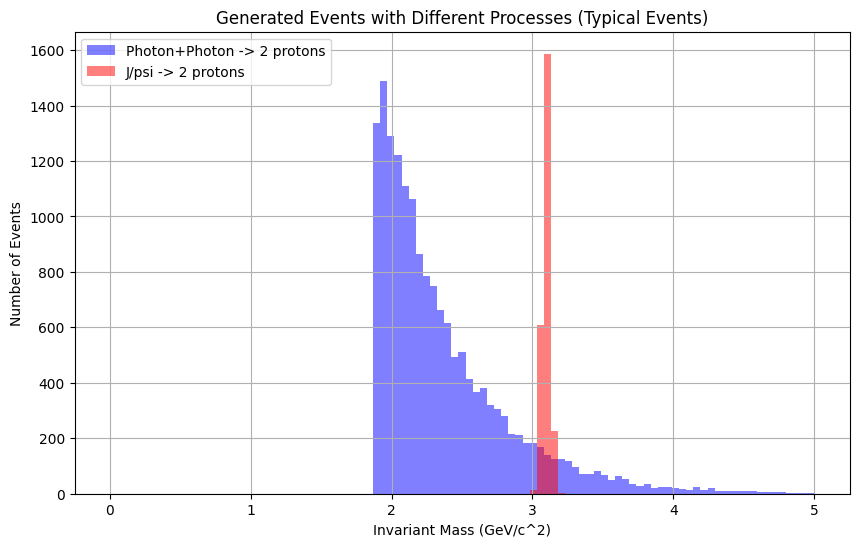

In [109]:
def plot_event_distribution_proton(events_photon_photon_proton, events_jpsi_protons):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_photon_photon_proton, bins, alpha=0.5, label='Photon+Photon -> 2 protons', color='blue')
    plt.hist(events_jpsi_protons, bins, alpha=0.5, label='J/psi -> 2 protons', color='red')
    plt.xlabel('Invariant Mass (GeV/c^2)')
    #plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

#plt.rcParams.update({'font.size': 15})

def generate_all_events_proton():
    events_photon_photon_proton = generate_photon_photon_proton_events(n_photon_photon_proton)
    events_jpsi_protons = generate_jpsi_protons_events(n_jpsi_protons)
    

    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)
    jpsi_protons  = compute_invariant_masses_for_events_jpsi_proton(events_jpsi_protons)
    
    plot_event_distribution_proton(photon_photon_proton, jpsi_protons)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_proton()

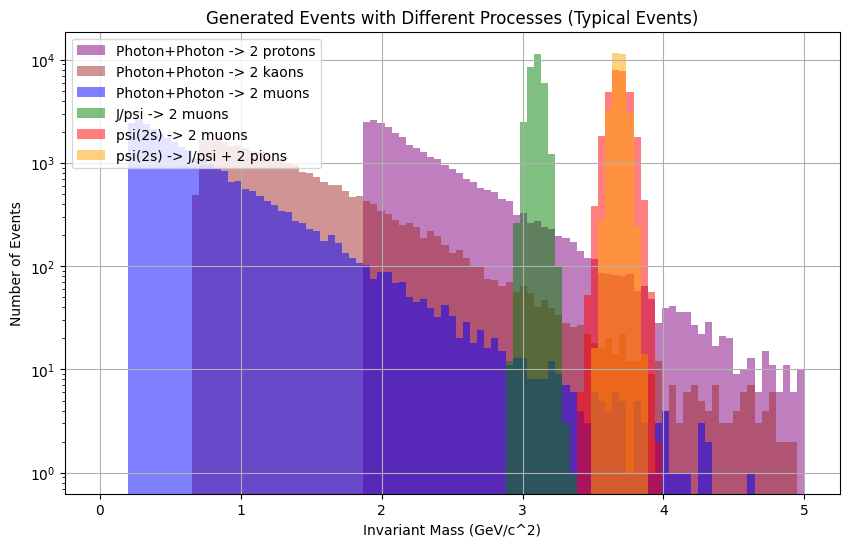

In [110]:

def plot_event_distribution_training(events_photon_photon_proton, events_pp_kaons, events_photon_photon, events_jpsi, events_psi2S_muons, events_psi2S_jpsi_pions):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 5, 100)
    plt.hist(events_photon_photon_proton, bins, alpha=0.5, label='Photon+Photon -> 2 protons', color='purple')
    plt.hist(events_pp_kaons, bins, alpha=0.5, label='Photon+Photon -> 2 kaons', color='brown')
    plt.hist(events_photon_photon, bins, alpha=0.5, label='Photon+Photon -> 2 muons', color='blue')
    plt.hist(events_jpsi, bins, alpha=0.5, label='J/psi -> 2 muons', color='green')
    plt.hist(events_psi2S_muons, bins, alpha=0.5, label='psi(2s) -> 2 muons', color='red')
    plt.hist(events_psi2S_jpsi_pions, bins, alpha=0.5, label='psi(2s) -> J/psi + 2 pions', color='orange')
    
    plt.xlabel('Invariant Mass (GeV/c^2)')
    plt.yscale('log')  # Log scale for y-axis
    plt.ylabel('Number of Events')
    plt.title('Generated Events with Different Processes (Typical Events)')
    plt.legend(loc='upper left', fontsize = 10)
    plt.grid(True)
    plt.show()

plt.rcParams.update({'font.size': 10})

def generate_all_events_training():
    events_photon_photon_proton = generate_photon_photon_proton_events(30000)
    events_pp_kaons = generate_pp_kaon_events(30000)
    events_photon_photon = generate_photon_photon_events(30000)
    events_jpsi = generate_jpsi_events(30000)
    events_psi2S_muons = generate_psi2S_muons_events(30000)
    events_psi2S_jpsi_pions = generate_psi2S_jpsi_pions_events_new(30000)

    photon_photon_proton = compute_invariant_masses_for_events_jpsi_proton(events_photon_photon_proton)
    pp_kaons      = compute_invariant_masses_for_events(events_pp_kaons)
    photon_photon = compute_invariant_masses_for_events(events_photon_photon)
    jpsi          = compute_invariant_masses_for_events(events_jpsi)
    psi2s_muons   = compute_invariant_masses_for_events(events_psi2S_muons)
    psi2s_jpsi_pi = compute_invariant_masses_for_events_psi2s(events_psi2S_jpsi_pions)

    
    plot_event_distribution_training(photon_photon_proton, pp_kaons, photon_photon, jpsi, psi2s_muons, psi2s_jpsi_pi)
    #plot_event_distribution1(jpsi_4pi)

# Run the generation and plotting
generate_all_events_training()

[237.33218955738022, 241.100994766857, 245.50712267677608, 260.0820187150673, 214.14626789034133, 219.45879466816587, 197.55676297064198, 238.78600602539314, 264.59795334587, 203.40122204427584, 207.98608077377637, 251.35650587008033, 209.957658993152, 223.8084050592398, 237.96432270389354, 224.98949126725051, 242.02366629891148, 198.78137781099718, 180.06716646873437, 279.215679665472, 241.5173294259413, 240.1619248985619, 210.63304857056514, 203.2848162544364, 249.86207737087364, 238.9016325342604, 191.754287198588, 224.1309811601289, 232.09476534183347, 202.41550964065928, 236.89275019594606, 218.96371210600063, 212.6509281640819, 218.1359007757469, 201.60916555726155, 253.54116518884337, 227.4686652743056, 221.66468861956812, 234.92533548795583, 207.91182225096105, 203.74720184589478, 244.33764346232707, 216.94251930178055, 268.0572357070166, 218.32955258491253, 236.05529334658647, 226.63761607021087, 225.70411142907687, 239.74136920786285, 178.27827609664118, 210.00614881597446, 2

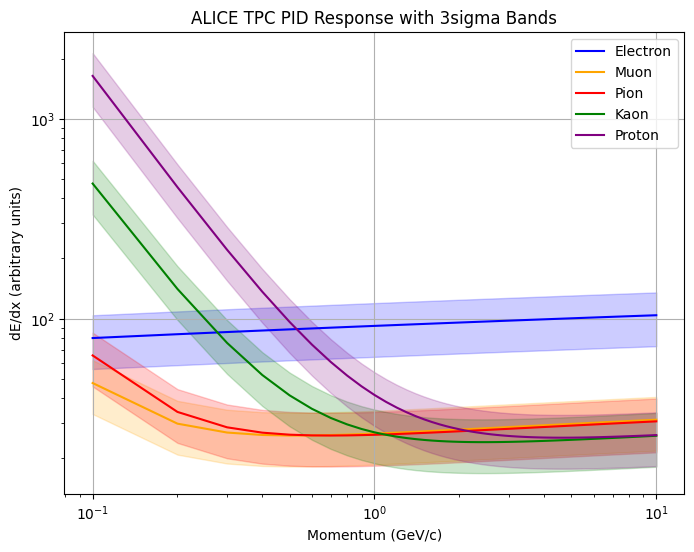

In [4]:
#PID PLOT WITH BANDS
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = ((K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2)) * 17
    
    return dEdx

def tpc_pid_response(momentum, particle_type, stretch_factor=1):
    mass_dict = {
        'electron': 0.000511,
        'muon': 0.10566,
        'pion': 0.13957,
        'kaon': 0.49367,
        'proton': 0.93827
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    dEdx = bethe_bloch(momentum, mass) * stretch_factor
    lower_band = dEdx * 0.7
    upper_band = dEdx * 1.3
    
    return dEdx, lower_band, upper_band

def error_extremes(momentum, particle_type, stretch_factor):
    _, lower_band, upper_band = tpc_pid_response(momentum, particle_type, stretch_factor)
    return upper_band, lower_band

def random_gaussian(mean, sigma):

    return np.random.normal(mean, sigma)

def gaussian_tpc_response(momentum, particle_type, stretch_factor):

    # Get the mean dE/dx from TPC PID response
    mean_dEdx, _, _ = tpc_pid_response(momentum, particle_type,stretch_factor)
    
    # Calculate the extremes for the 3σ band
    upper_band, lower_band = error_extremes(momentum, particle_type, stretch_factor)
    
    # Estimate σ as 1/3rd of the difference between the upper and lower bands
    sigma_dEdx = (upper_band - lower_band) / 6
    
    # Generate a random dE/dx value from a Gaussian distribution
    random_dEdx = random_gaussian(mean_dEdx, sigma_dEdx)
    
    return random_dEdx

 # Example usage
momentum = .3  # Example momentum in GeV/c
particle_type = 'proton'  # Example particle type
x=1000 #Amount of random numbers

rn=[]
for _ in range(x):

    if (particle_type == 'electron'):
        stretch_factor=1
    elif (particle_type == 'muon'):
        stretch_factor=.41
    elif (particle_type == 'pion'):
        stretch_factor=.41
    elif (particle_type == 'kaon'):
        stretch_factor=.38
    elif (particle_type == 'proton'):
        stretch_factor=.40

    random_value = gaussian_tpc_response(momentum, particle_type, stretch_factor)
    rn.append(random_value)
print(rn)

xvalues=[]
for _ in range(x):
    xvalues.append(momentum)
print(xvalues)

def plot_tpc_pid_response(momentum_range):
    """
    Plot the TPC PID response and error bands for various particle types.
    """
    # Calculate responses and PID bands for different particle species
    particle_types = {
        'Electron': {'color': 'blue', 'stretch_factor': 1},
        'Muon': {'color': 'orange', 'stretch_factor': 0.41},
        'Pion': {'color': 'red', 'stretch_factor': 0.41},
        'Kaon': {'color': 'green', 'stretch_factor': 0.38},
        'Proton': {'color': 'purple', 'stretch_factor': 0.4}
    }
    
    plt.figure(figsize=(8, 6))
    
    for particle, settings in particle_types.items():
        response, lower_band, upper_band = tpc_pid_response(momentum_range, particle.lower(), settings['stretch_factor'])
        plt.plot(momentum_range, response, label=particle, color=settings['color'])
        plt.fill_between(momentum_range, lower_band, upper_band, color=settings['color'], alpha=0.2)
    
   # plt.plot(xvalues,rn, color= 'black')
    
    plt.xlabel('Momentum (GeV/c)')
    plt.ylabel('dE/dx (arbitrary units)')
    plt.xscale('log')  # Log scale for x-axis
    plt.yscale('log')  # Log scale for y-axis
    plt.title('ALICE TPC PID Response with 3sigma Bands')
    plt.legend()
    plt.grid(True)
    #plt.savefig("PID_empty.pdf")
    plt.show()
    
# Generate a momentum range and plot
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c
plot_tpc_pid_response(momentum_range)


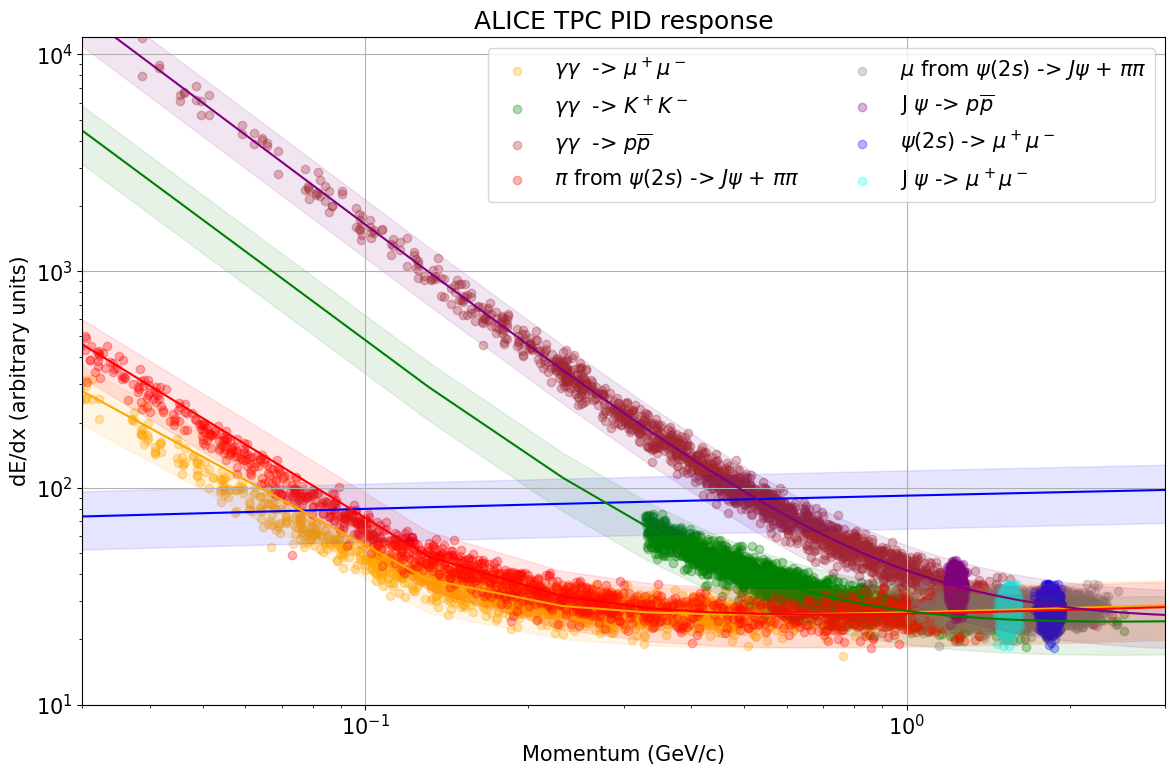

In [5]:
n_events = 1000

plt.rcParams.update({'font.size': 15})

#Generate Jpsi events
jpsimuon_events = generate_jpsi_events(n_events)
jpsimuon1_dEdx = []
jpsimuon2_dEdx = []
jpsimuon1_momenta = []
jpsimuon2_momenta = []

# Iterate over events and calculate PID response for muons
for event in jpsimuon_events:
    jpsimuon1_p, jpsimuon2_p = event  # Extract momenta of muons
    
    # Calculate momentum magnitudes
    jpsimuon1_momentum = np.linalg.norm(jpsimuon1_p)
    jpsimuon2_momentum = np.linalg.norm(jpsimuon2_p)
    
    # Append momenta for later use
    jpsimuon1_momenta.append(jpsimuon1_momentum)
    jpsimuon1_momenta.append(jpsimuon2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_jpsimuon1 = gaussian_tpc_response(jpsimuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_jpsimuon2 = gaussian_tpc_response(jpsimuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    jpsimuon1_dEdx.append(dEdx_jpsimuon1)
    jpsimuon1_dEdx.append(dEdx_jpsimuon2)

# Generate photon-photon events
photonmuon_events = generate_photon_photon_events(n_events)
photonmuon1_dEdx = []
photonmuon2_dEdx = []
photonmuon1_momenta = []
photonmuon2_momenta = []

# Iterate over events and calculate PID response for muons
for event in photonmuon_events:
    photonmuon1_p, photonmuon2_p = event  # Extract momenta of muons

    # Calculate momentum magnitudes
    photonmuon1_momentum = np.linalg.norm(photonmuon1_p)
    photonmuon2_momentum = np.linalg.norm(photonmuon2_p)
    
    # Append momenta for later use
    photonmuon1_momenta.append(photonmuon1_momentum)
    photonmuon1_momenta.append(photonmuon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each muon
    dEdx_photonmuon1 = gaussian_tpc_response(photonmuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_photonmuon2 = gaussian_tpc_response(photonmuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    photonmuon1_dEdx.append(dEdx_photonmuon1)
    photonmuon1_dEdx.append(dEdx_photonmuon2)

#Generate psi2s muon events
psi2smuon_events = generate_psi2S_muons_events(n_events)
psi2smuon1_dEdx = []
psi2smuon2_dEdx = []
psi2smuon1_momenta = []
psi2smuon2_momenta = []

for event in psi2smuon_events:
    psi2smuon1_p, psi2smuon2_p = event  # Extract momenta of muons

    # Calculate momentum magnitudes
    psi2smuon1_momentum = np.linalg.norm(psi2smuon1_p)
    psi2smuon2_momentum = np.linalg.norm(psi2smuon2_p)
    
    # Append momenta for later use
    psi2smuon1_momenta.append(psi2smuon1_momentum)
    psi2smuon1_momenta.append(psi2smuon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each muon
    dEdx_psi2smuon1 = gaussian_tpc_response(psi2smuon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2smuon2 = gaussian_tpc_response(psi2smuon2_momentum, 'muon', stretch_factor=0.41)
    
    # Store the dE/dx values
    psi2smuon1_dEdx.append(dEdx_psi2smuon1)
    psi2smuon1_dEdx.append(dEdx_psi2smuon2)


#Generate psi2s muon pion events
psi2s_jpsi_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_events)
psi2s_jpsi_muon1_dEdx = []
psi2s_jpsi_muon2_dEdx = []
psi2s_jpsi_pion1_dEdx = []
psi2s_jpsi_pion2_dEdx = []
psi2s_jpsi_muon1_momenta = []
psi2s_jpsi_muon2_momenta = []
psi2s_jpsi_pion1_momenta = []
psi2s_jpsi_pion2_momenta = []

for event in psi2s_jpsi_pions_events:
    psi2s_jpsi_muon1_p, psi2s_jpsi_muon2_p, psi2s_jpsi_pion1_p, psi2s_jpsi_pion2_p, *_ = event

    psi2s_jpsi_muon1_momentum = np.linalg.norm(psi2s_jpsi_muon1_p)
    psi2s_jpsi_muon2_momentum = np.linalg.norm(psi2s_jpsi_muon2_p)
    psi2s_jpsi_pion1_momentum = np.linalg.norm(psi2s_jpsi_pion1_p)
    psi2s_jpsi_pion2_momentum = np.linalg.norm(psi2s_jpsi_pion2_p)

    psi2s_jpsi_muon1_momenta.append(psi2s_jpsi_muon1_momentum)
    psi2s_jpsi_muon1_momenta.append(psi2s_jpsi_muon2_momentum)
    psi2s_jpsi_pion1_momenta.append(psi2s_jpsi_pion1_momentum)
    psi2s_jpsi_pion1_momenta.append(psi2s_jpsi_pion2_momentum)    

    dEdx_psi2s_jpsi_muon1 = gaussian_tpc_response(psi2s_jpsi_muon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2s_jpsi_muon2 = gaussian_tpc_response(psi2s_jpsi_muon2_momentum, 'muon', stretch_factor=0.41)
    dEdx_psi2s_jpsi_pion1 = gaussian_tpc_response(psi2s_jpsi_pion1_momentum, 'pion', stretch_factor=0.41)
    dEdx_psi2s_jpsi_pion2 = gaussian_tpc_response(psi2s_jpsi_pion2_momentum, 'pion', stretch_factor=0.41)

    psi2s_jpsi_muon1_dEdx.append(dEdx_psi2s_jpsi_muon1)
    psi2s_jpsi_muon1_dEdx.append(dEdx_psi2s_jpsi_muon2)
    psi2s_jpsi_pion1_dEdx.append(dEdx_psi2s_jpsi_pion1)
    psi2s_jpsi_pion1_dEdx.append(dEdx_psi2s_jpsi_pion2)

# Generate photon-photon kaon events
photonkaon_events = generate_pp_kaon_events(n_events)
photonkaon1_dEdx = []
photonkaon2_dEdx = []
photonkaon1_momenta = []
photonkaon2_momenta = []

# Iterate over events and calculate PID response for kaons
for event in photonkaon_events:
    photonkaon1_p, photonkaon2_p = event  # Extract momenta of kaons

    # Calculate momentum magnitudes
    photonkaon1_momentum = np.linalg.norm(photonkaon1_p)
    photonkaon2_momentum = np.linalg.norm(photonkaon2_p)
    
    # Append momenta for later use
    photonkaon1_momenta.append(photonkaon1_momentum)
    photonkaon1_momenta.append(photonkaon2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each kaon
    dEdx_photonkaon1 = gaussian_tpc_response(photonkaon1_momentum, 'kaon', stretch_factor=0.38)
    dEdx_photonkaon2 = gaussian_tpc_response(photonkaon2_momentum, 'kaon', stretch_factor=0.38)
    
    # Store the dE/dx values
    photonkaon1_dEdx.append(dEdx_photonkaon1)
    photonkaon1_dEdx.append(dEdx_photonkaon2)

# Generate photon-photon proton events
photonproton_events = generate_photon_photon_proton_events(n_events)
photonproton1_dEdx = []
photonproton2_dEdx = []
photonproton1_momenta = []
photonproton2_momenta = []

# Iterate over events and calculate PID response for kaons
for event in photonproton_events:
    photonproton1_p, photonproton2_p = event  # Extract momenta of kaons

    # Calculate momentum magnitudes
    photonproton1_momentum = np.linalg.norm(photonproton1_p)
    photonproton2_momentum = np.linalg.norm(photonproton2_p)
    
    # Append momenta for later use
    photonproton1_momenta.append(photonproton1_momentum)
    photonproton1_momenta.append(photonproton2_momentum)
    
    # Calculate PID response (dE/dx) with Gaussian variations for each kaon
    dEdx_photonproton1 = gaussian_tpc_response(photonproton1_momentum, 'proton', stretch_factor=0.4)
    dEdx_photonproton2 = gaussian_tpc_response(photonproton2_momentum, 'proton', stretch_factor=0.4)
    
    # Store the dE/dx values
    photonproton1_dEdx.append(dEdx_photonproton1)
    photonproton1_dEdx.append(dEdx_photonproton2)

#Generate Jpsi proton events
jpsiproton_events = generate_jpsi_protons_events(n_events)
jpsiproton1_dEdx = []
jpsiproton2_dEdx = []
jpsiproton1_momenta = []
jpsiproton2_momenta = []

# Iterate over events and calculate PID response for protons
for event in jpsiproton_events:
    jpsiproton1_p, jpsiproton2_p = event  # Extract momenta of protons
    
    # Calculate momentum magnitudes
    jpsiproton1_momentum = np.linalg.norm(jpsiproton1_p)
    jpsiproton2_momentum = np.linalg.norm(jpsiproton2_p)
    
    # Append momenta for later use
    jpsiproton1_momenta.append(jpsiproton1_momentum)
    jpsiproton1_momenta.append(jpsiproton2_momentum)
    
    # Calculate PID response (dE/dx) for each muon
    dEdx_jpsiproton1 = gaussian_tpc_response(jpsiproton1_momentum, 'proton', stretch_factor=0.4)
    dEdx_jpsiproton2 = gaussian_tpc_response(jpsiproton2_momentum, 'proton', stretch_factor=0.4)
    
    # Store the dE/dx values
    jpsiproton1_dEdx.append(dEdx_jpsiproton1)
    jpsiproton1_dEdx.append(dEdx_jpsiproton2)

#Generate pentaquark muon proton events
pentaquark_muons_proton_events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_events)
pentaquark_muon1_dEdx = []
pentaquark_muon2_dEdx = []
pentaquark_proton_dEdx = []
pentaquark_muon1_momenta = []
pentaquark_muon2_momenta = []
pentaquark_proton_momenta = []

for event in pentaquark_muons_proton_events:
    pentaquark_muon1_p, pentaquark_muon2_p, pentaquark_proton_p, *_ = event

    pentaquark_muon1_momentum = np.linalg.norm(pentaquark_muon1_p)
    pentaquark_muon2_momentum = np.linalg.norm(pentaquark_muon2_p)
    pentaquark_proton_momentum = np.linalg.norm(pentaquark_proton_p)

    pentaquark_muon1_momenta.append(pentaquark_muon1_momentum)
    pentaquark_muon1_momenta.append(pentaquark_muon2_momentum)
    pentaquark_proton_momenta.append(pentaquark_proton_momentum)
  
    dEdx_pentaquark_muon1 = gaussian_tpc_response(pentaquark_muon1_momentum, 'muon', stretch_factor=0.41)
    dEdx_pentaquark_muon2 = gaussian_tpc_response(pentaquark_muon2_momentum, 'muon', stretch_factor=0.41)
    dEdx_pentaquark_proton = gaussian_tpc_response(pentaquark_proton_momentum, 'proton', stretch_factor=0.4)
  
    pentaquark_muon1_dEdx.append(dEdx_pentaquark_muon1)
    pentaquark_muon1_dEdx.append(dEdx_pentaquark_muon2)
    pentaquark_proton_dEdx.append(dEdx_pentaquark_proton)

# Plot the results
plt.figure(figsize=(12, 8)) 


#Photon Muon 
plt.scatter(photonmuon1_momenta, photonmuon1_dEdx, color='orange', alpha=.3, label=r'$\gamma \gamma$  -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 2 PID Response')
plt.grid(True)
plt.legend()

#photon Kaon dE/dx vs Momentum
plt.scatter(photonkaon1_momenta, photonkaon1_dEdx, color='green', alpha=.3, label=r'$\gamma \gamma$  -> $K^+ K^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Kaon PID Response')
plt.grid(True)
plt.legend()

#photon proton dE/dx vs Momentum
plt.scatter(photonproton1_momenta, photonproton1_dEdx, color='brown', alpha=.3, label=r'$\gamma \gamma$  -> $p \overline{p}$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Proton PID Response')
plt.grid(True)
plt.legend()

# Scatter plot for Pions
plt.scatter(psi2s_jpsi_pion1_momenta, psi2s_jpsi_pion1_dEdx, color='red', alpha=0.3, label=r'$\pi$ from $\psi (2s)$ -> $J \psi$ + $\pi \pi$')
plt.xlabel('Event Index')
plt.ylabel('Momentum (GeV/c)')
plt.title('Momentum Distribution for Muons from psi(2S) J/psi Events')
plt.legend()
plt.grid(True)

# Scatter plot for Muons
plt.scatter(psi2s_jpsi_muon1_momenta, psi2s_jpsi_muon1_dEdx, color='grey', alpha=0.3, label=r'$\mu$ from $\psi (2s)$ -> $J \psi$ + $\pi \pi$')
plt.xlabel('Event Index')
plt.ylabel('Momentum (GeV/c)')
plt.title('Momentum Distribution for Muons from psi(2S) J/psi Events')
plt.legend()
plt.grid(True)

#Jpsi Proton dE/dx vs Momentum
plt.scatter(jpsiproton1_momenta, jpsiproton1_dEdx, color='purple', alpha=.3, label=r'J $\psi$ -> $p \overline{p}$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Proton 1 PID Response')
plt.grid(True)
plt.legend()

#Psi2s Muon 
plt.scatter(psi2smuon1_momenta, psi2smuon1_dEdx, color='blue', alpha=.3, label=r'$\psi (2s)$ -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 2 PID Response')
plt.grid(True)
plt.legend()

#Jpsi Muon dE/dx vs Momentum
plt.scatter(jpsimuon1_momenta, jpsimuon1_dEdx, color='cyan', alpha=.3, label=r'J $\psi$ -> $\mu^+ \mu^-$')
plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.title('Muon 1 PID Response')
plt.grid(True)
plt.legend()

# Scatter plot for Pentaquark Muons
# plt.scatter(pentaquark_muon1_momenta, pentaquark_muon1_dEdx, color='brown', alpha=0.3, label=r'$\mu$ from pentaquark')
# plt.xlabel('Event Index')
# plt.ylabel('Momentum (GeV/c)')
# plt.title('Momentum Distribution for Muons from Pentaquark Events')
# plt.legend()
# plt.grid(True)

# # Scatter plot for Pentaquark Proton 
# plt.scatter(pentaquark_proton_momenta, pentaquark_proton_dEdx, color='gray', alpha=0.3, label=r'p from pentaquark')
# plt.xlabel('Event Index')
# plt.ylabel('Momentum (GeV/c)')
# plt.title('Momentum Distribution for Proton from Pentaquark Events')
# plt.legend()
# plt.grid(True)


particle_types = {
        'Electron': {'color': 'blue', 'stretch_factor': 1},
        'Muon': {'color': 'orange', 'stretch_factor': 0.41},
        'Pion': {'color': 'red', 'stretch_factor': 0.41},
        'Kaon': {'color': 'green', 'stretch_factor': 0.38},
        'Proton': {'color': 'purple', 'stretch_factor': 0.4}
    }
    
    
momentum_range = np.linspace(0.03, 10, 100)   
for particle, settings in particle_types.items():
    response, lower_band, upper_band = tpc_pid_response(momentum_range, particle.lower(), settings['stretch_factor'])
    plt.plot(momentum_range, response, label = '_nolegend_', color=settings['color'])
    plt.fill_between(momentum_range, lower_band, upper_band, color=settings['color'], alpha=0.1)
    # plt.legend()
    
   # plt.plot(xvalues,rn, color= 'black')
    

plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.03, 3])
plt.ylim([10, 12000])
plt.title('ALICE TPC PID response')
plt.legend(loc='upper right', ncol = 2, fontsize="15") #, fontsize="15"
plt.grid(True)

# Get current axes and create a legend with 2 columns
# ax = plt.gca()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=2)
# ax.set_xlim([0.03, 3])
# ax.set_ylim([10, 100000])

# Adjust layout to reserve space for the legend (e.g. top 10% of the figure)
plt.tight_layout() #rect=[0, 0, 1, 0.9]
plt.show()



# Creation of Dataframes

## Generation 1

In [6]:

import pandas as pd

data_for_pp_muons_gen1 = []
pp_muons_events = generate_photon_photon_events(n_photon_photon)
for event_id, event in enumerate(pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_pp_muons_gen1 = pd.DataFrame(data_for_pp_muons_gen1)

data_for_jpsimuons_gen1= []
jpsi_muons_events = generate_jpsi_events(n_jpsi)
for event_id, event in enumerate(jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_jpsimuons_gen1 = pd.DataFrame(data_for_jpsimuons_gen1)

data_for_jpsiprotons_gen1= []
jpsi_protons_events = generate_jpsi_protons_events(n_jpsi_protons)
for event_id, event in enumerate(jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
df_jpsiprotons_gen1 = pd.DataFrame(data_for_jpsiprotons_gen1)

data_for_psi2smuons_gen1 = []
psi2s_muons_events = generate_psi2S_muons_events(n_psi2S_muons)
for event_id, event in enumerate(psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
df_psi2smuons_gen1 = pd.DataFrame(data_for_psi2smuons_gen1)

data_for_pp_kaons_gen1 = []
pp_kaons_events = generate_pp_kaon_events(n_pp_kaon)
for event_id, event in enumerate(pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
df_pp_kaons_gen1 = pd.DataFrame(data_for_pp_kaons_gen1)

data_for_pp_protons_gen1 = []
pp_protons_events = generate_photon_photon_proton_events(n_photon_photon_proton)
for event_id, event in enumerate(pp_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
df_pp_protons_gen1 = pd.DataFrame(data_for_pp_protons_gen1)

data_for_psi2s_muons_pions_gen1 = []
psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_psi2S_jpsi_pions)
for event_id, event in enumerate(psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
df_psi2s_muons_pions_gen1 = pd.DataFrame(data_for_psi2s_muons_pions_gen1)
df_psi2s_muons_pions_gen1.head()

data_for_pentaquark_gen1 = []
pentaquark_events = generate_pentaquark_jpsi_muons_events_smearing_after_boost_with_angles(n_pq1)
for event_id, event in enumerate(pentaquark_events):
    muon1_p, muon2_p, proton_p, _, _, _ = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    proton_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
    data_for_pentaquark_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton_p[0], "py": proton_p[1], "pz": proton_p[2], "Energy": proton_E})
df_pentaquark_gen1 = pd.DataFrame(data_for_pentaquark_gen1)

data_for_jpsi_four_pions_gen1 = []
jpsi_four_pions_events = generate_jpsi_four_pions(n_jpsi_4pi)
for event_id, event in enumerate(jpsi_four_pions_events):
    pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, pion4_p, p1_E, p2_E, p3_E, p4_E = event
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
    data_for_jpsi_four_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion4_p[0], "py": pion4_p[1], "pz": pion4_p[2], "Energy": p4_E})
df_jpsi_four_pions_gen1 = pd.DataFrame(data_for_jpsi_four_pions_gen1)

# data_for_jpsi_three_pions_gen1 = []
# jpsi_three_pions_events = generate_jpsi_3pions_events(100)
# for event_id, event in enumerate(jpsi_three_pions_events):
#     pion1_p_lab_smeared, pion2_p_lab_smeared, pion3_p, p1_E, p2_E, p3_E, = event
#     data_for_jpsi_three_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p_lab_smeared[0], "py": pion1_p_lab_smeared[1], "pz": pion1_p_lab_smeared[2], "Energy": p1_E})
#     data_for_jpsi_three_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p_lab_smeared[0], "py": pion2_p_lab_smeared[1], "pz": pion2_p_lab_smeared[2], "Energy": p2_E})
#     data_for_jpsi_three_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion3_p[0], "py": pion3_p[1], "pz": pion3_p[2], "Energy": p3_E})
#     df_jpsi_three_pions_gen1 = pd.DataFrame(data_for_jpsi_three_pions_gen1)


In [7]:
n_training = 30000

training_data_for_pp_muons_gen1 = []
training_pp_muons_events = generate_photon_photon_events(n_training)
for event_id, event in enumerate(training_pp_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_pp_muons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_for_pp_muons_gen1 = pd.DataFrame(training_data_for_pp_muons_gen1)

training_data_for_jpsimuons_gen1= []
training_jpsi_muons_events = generate_jpsi_events(n_training)
for event_id, event in enumerate(training_jpsi_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_jpsimuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_jpsimuons_gen1 = pd.DataFrame(training_data_for_jpsimuons_gen1)

training_data_for_jpsiprotons_gen1= []
training_jpsi_protons_events = generate_jpsi_protons_events(n_training)
for event_id, event in enumerate(training_jpsi_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    training_data_for_jpsiprotons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
training_df_jpsiprotons_gen1 = pd.DataFrame(training_data_for_jpsiprotons_gen1)

training_data_for_psi2smuons_gen1 = []
training_psi2s_muons_events = generate_psi2S_muons_events(n_training)
for event_id, event in enumerate(training_psi2s_muons_events):
    muon1_p, muon2_p = event
    muon1_E = np.sqrt(np.linalg.norm(muon1_p)**2 + m_muon**2)
    muon2_E = np.sqrt(np.linalg.norm(muon2_p)**2 + m_muon**2)
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p[0], "py": muon1_p[1], "pz": muon1_p[2], "Energy": muon1_E})
    training_data_for_psi2smuons_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p[0], "py": muon2_p[1], "pz": muon2_p[2], "Energy": muon2_E})
training_df_psi2smuons_gen1 = pd.DataFrame(training_data_for_psi2smuons_gen1)

training_data_for_pp_kaons_gen1 = []
training_pp_kaons_events = generate_pp_kaon_events(n_training)
for event_id, event in enumerate(training_pp_kaons_events):
    kaon1_p, kaon2_p = event
    kaon1_E = np.sqrt(np.linalg.norm(kaon1_p)**2 + m_kaon**2)
    kaon2_E = np.sqrt(np.linalg.norm(kaon2_p)**2 + m_kaon**2)
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon1_p[0], "py": kaon1_p[1], "pz": kaon1_p[2], "Energy": kaon1_E})
    training_data_for_pp_kaons_gen1.append({"EventID": event_id, "Particle": "kaon", "px": kaon2_p[0], "py": kaon2_p[1], "pz": kaon2_p[2], "Energy": kaon2_E})
training_df_pp_kaons_gen1 = pd.DataFrame(training_data_for_pp_kaons_gen1)

training_data_for_pp_protons_gen1 = []
training_pp_protons_events = generate_photon_photon_proton_events(n_training)
for event_id, event in enumerate(training_pp_protons_events):
    proton1_p, proton2_p = event
    proton1_E = np.sqrt(np.linalg.norm(proton1_p)**2 + m_proton**2)
    proton2_E = np.sqrt(np.linalg.norm(proton2_p)**2 + m_proton**2)
    training_data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton1_p[0], "py": proton1_p[1], "pz": proton1_p[2], "Energy": proton1_E})
    training_data_for_pp_protons_gen1.append({"EventID": event_id, "Particle": "proton", "px": proton2_p[0], "py": proton2_p[1], "pz": proton2_p[2], "Energy": proton2_E})
training_df_pp_protons_gen1 = pd.DataFrame(training_data_for_pp_protons_gen1)

training_data_for_psi2s_muons_pions_gen1 = []
training_psi2s_muons_pions_events = generate_psi2S_jpsi_pions_events_smearing_after_boost_with_angles(n_training)
for event_id, event in enumerate(training_psi2s_muons_pions_events):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = event
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon1_p_lab_smeared[0], "py": muon1_p_lab_smeared[1], "pz": muon1_p_lab_smeared[2], "Energy": m1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "muon", "px": muon2_p_lab_smeared[0], "py": muon2_p_lab_smeared[1], "pz": muon2_p_lab_smeared[2], "Energy": m2_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion1_p[0], "py": pion1_p[1], "pz": pion1_p[2], "Energy": p1_E})
    training_data_for_psi2s_muons_pions_gen1.append({"EventID": event_id, "Particle": "pion", "px": pion2_p[0], "py": pion2_p[1], "pz": pion2_p[2], "Energy": p2_E})
training_df_psi2s_muons_pions_gen1 = pd.DataFrame(training_data_for_psi2s_muons_pions_gen1)
training_df_psi2s_muons_pions_gen1.head()

,EventID,Particle,px,py,pz,Energy
0,0,muon,1.091739,0.476660,-0.877713,1.483456
1,0,muon,-0.808009,-1.339503,0.730422,1.729690
2,0,pion,0.115215,-0.043725,-0.228141,0.294474
3,0,pion,-0.446016,0.881646,0.404670,0.161535
4,1,muon,-1.104928,1.143579,0.722695,1.749883


In [8]:
df_pp_protons_gen1.head()

,EventID,Particle,px,py,pz,Energy
0,0,proton,0.202029,-0.537394,0.071433,1.102068
1,0,proton,-0.202029,0.537394,-0.071433,1.102068
2,1,proton,-0.337186,-0.144243,0.590554,1.167518
3,1,proton,0.337186,0.144243,-0.590554,1.167518
4,2,proton,-0.655955,-0.845978,-0.578685,1.536450


## Generation 2 

In [9]:
stretch_factors = {
    'electron': 1.0,
    'muon': .41,
    'pion': .41,
    'kaon': .38,
    'proton': .4
}

#NSIGMA AWAY FROM EACH PARTICLE
def calculate_nsigma(momentum, dEdx_observed, stretch_factors=None, error_fraction=0.3):
  
    if stretch_factors is None:
        stretch_factors = {
            'electron': 1.0,
            'muon': .41,
            'pion': .41,
            'kaon': .38,
            'proton': .40
        }
    
    particle_types = ['electron', 'muon', 'pion', 'kaon', 'proton']
    nsigma_dict = {}

    for particle in particle_types:
        stretch_factor = stretch_factors.get(particle, 1.0)
        dEdx_expected, _, _ = tpc_pid_response(momentum, particle, stretch_factor)
        sigma = dEdx_expected * error_fraction  # Standard deviation as a fraction of the expected dE/dx
        nsigma = (dEdx_observed - dEdx_expected) / sigma
        nsigma_dict[particle] = nsigma
    
    return nsigma_dict


# Apply the calculate_nsigma function and expand the results into separate columns
nsigma_columns = ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']


In [10]:
df_jpsimuons_gen2 = df_jpsimuons_gen1.copy()
df_jpsimuons_gen2['Momentum']= np.sqrt(df_jpsimuons_gen2['px']**2 + df_jpsimuons_gen2['py']**2 + df_jpsimuons_gen2['pz']**2)
df_jpsimuons_gen2['PID Signal'] = df_jpsimuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]), axis=1)
df_jpsimuons_gen2[nsigma_columns] = df_jpsimuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsimuons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,1.145944,-0.886698,-0.575747,1.562712,1.559136,22.989753,-2.521267,-0.537994,-0.486078,-0.224777,-0.845014
1,0,muon,-1.145944,0.886698,0.575747,1.562712,1.559136,29.455984,-2.292861,0.248239,0.314757,0.649554,-0.145135
2,1,muon,-0.213346,-0.955460,-1.208987,1.559241,1.555658,26.532927,-2.395996,-0.106683,-0.046798,0.253442,-0.464569
3,1,muon,0.213346,0.955460,1.208987,1.559241,1.555658,28.491717,-2.326797,0.131524,0.195830,0.518235,-0.252783
4,2,muon,0.147622,-0.747664,1.281406,1.494644,1.490904,29.576162,-2.286023,0.273853,0.339876,0.645029,-0.202091
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249595,124797,muon,0.392791,1.361574,-0.654636,1.564570,1.560999,29.204931,-2.301797,0.217423,0.283393,0.616118,-0.170515
249596,124798,muon,-0.612358,-1.390828,0.324907,1.557598,1.554011,31.685208,-2.213914,0.520161,0.591658,0.949441,0.090767
249597,124798,muon,0.612358,1.390828,-0.324907,1.557598,1.554011,27.327127,-2.367882,-0.009860,0.051803,0.360375,-0.380194
249598,124799,muon,-0.200605,0.845451,1.269099,1.541689,1.538064,27.098439,-2.375415,-0.035345,0.025647,0.325260,-0.419440


In [11]:
training_df_jpsimuons_gen2 = training_df_jpsimuons_gen1.copy()
training_df_jpsimuons_gen2['Momentum']= np.sqrt(training_df_jpsimuons_gen2['px']**2 + training_df_jpsimuons_gen2['py']**2 + training_df_jpsimuons_gen2['pz']**2)
training_df_jpsimuons_gen2['PID Signal'] = training_df_jpsimuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]), axis=1)
training_df_jpsimuons_gen2[nsigma_columns] = training_df_jpsimuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_jpsimuons_gen2.head()

In [12]:
df_jpsiprotons_gen2 = df_jpsiprotons_gen1.copy()
df_jpsiprotons_gen2['Momentum']= np.sqrt(df_jpsiprotons_gen2['px']**2 + df_jpsiprotons_gen2['py']**2 + df_jpsiprotons_gen2['pz']**2)
df_jpsiprotons_gen2['PID Signal'] = df_jpsiprotons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_jpsiprotons_gen2[nsigma_columns] = df_jpsiprotons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsiprotons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,1.044225,-0.673034,0.187909,1.567971,1.256459,33.710795,-2.128179,0.825089,0.895599,1.078834,-0.105682
1,0,proton,-1.044225,0.673034,-0.187909,1.567971,1.256459,34.422924,-2.102721,0.912934,0.984934,1.172040,-0.037499
2,1,proton,1.172791,0.163236,-0.260735,1.532942,1.212464,33.778041,-2.123360,0.842925,0.912254,1.055098,-0.176957
3,1,proton,-1.172791,-0.163236,0.260735,1.532942,1.212464,34.272548,-2.105647,0.904065,0.974409,1.119345,-0.130748
4,2,proton,0.956422,-0.445861,-0.563040,1.519998,1.196055,30.065147,-2.255537,0.387089,0.448317,0.561040,-0.550799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,2437,proton,-0.437834,1.106528,-0.374779,1.560899,1.247622,40.099294,-1.899225,1.615400,1.698975,1.907572,0.487904
4876,2438,proton,0.682864,0.405031,0.954609,1.556109,1.241625,35.525785,-2.062448,1.052335,1.126194,1.305282,0.041090
4877,2438,proton,-0.682864,-0.405031,-0.954609,1.556109,1.241625,39.676686,-1.913956,1.564765,1.647253,1.847267,0.435364
4878,2439,proton,-1.006530,0.663438,-0.142269,1.534059,1.213875,41.848644,-1.834359,1.840377,1.926327,2.104995,0.580377


In [13]:
training_df_jpsiprotons_gen2 = training_df_jpsiprotons_gen1.copy()
training_df_jpsiprotons_gen2['Momentum']= np.sqrt(training_df_jpsiprotons_gen2['px']**2 + training_df_jpsiprotons_gen2['py']**2 + training_df_jpsiprotons_gen2['pz']**2)
training_df_jpsiprotons_gen2['PID Signal'] = training_df_jpsiprotons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_jpsiprotons_gen2[nsigma_columns] = training_df_jpsiprotons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
training_df_jpsiprotons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,0.050714,1.010565,0.706251,1.549983,1.233939,30.861665,-2.228917,0.478068,0.542021,0.691140,-0.414279
1,0,proton,-0.050714,-1.010565,-0.706251,1.549983,1.233939,30.463616,-2.243161,0.428909,0.492038,0.639233,-0.451928
2,1,proton,1.032621,0.158432,0.668907,1.555213,1.240502,32.895133,-2.156497,0.727816,0.796174,0.961002,-0.210697
3,1,proton,-1.032621,-0.158432,-0.668907,1.555213,1.240502,32.433965,-2.172995,0.670882,0.738281,0.900798,-0.254475
4,2,proton,-0.708651,-0.009964,-1.005599,1.547049,1.230250,32.965518,-2.153430,0.738675,0.806879,0.962813,-0.221664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,29997,proton,0.699890,0.643079,-0.774226,1.543588,1.225896,33.673145,-2.127863,0.827028,0.896563,1.051771,-0.162604
59996,29998,proton,0.274585,0.339935,1.135181,1.536044,1.216383,34.835695,-2.085700,0.972805,1.044435,1.195656,-0.070786
59997,29998,proton,-0.274585,-0.339935,-1.135181,1.536044,1.216383,31.557465,-2.203109,0.567574,0.632462,0.769454,-0.377809
59998,29999,proton,-0.639570,0.655859,0.879842,1.578976,1.270166,25.375553,-2.426713,-0.205310,-0.151950,-0.005046,-0.886270


In [14]:
df_pentaquark_gen2 = df_pentaquark_gen1.copy()
df_pentaquark_gen2['Momentum']= np.sqrt(df_pentaquark_gen2['px']**2 + df_pentaquark_gen2['py']**2 + df_pentaquark_gen2['pz']**2)
df_pentaquark_gen2['PID Signal'] = df_pentaquark_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pentaquark_gen2[nsigma_columns] = df_pentaquark_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pentaquark_gen2.head()


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,0.270130,-0.902276,1.013448,1.387556,1.383527,29.168209,-2.296170,0.242041,0.305617,0.549530,-0.368447
1,0,muon,-0.980730,0.861625,-1.199134,1.775758,1.772611,26.990842,-2.386657,-0.080574,-0.018147,0.357413,-0.248054
2,0,proton,0.721770,0.033385,0.196338,1.131733,0.748742,63.349392,-1.001010,4.706755,4.769486,3.553624,0.435576
3,1,muon,0.524847,-1.758333,0.725372,1.975988,1.973161,25.061653,-2.459466,-0.335794,-0.277146,0.113434,-0.362084
4,1,muon,-0.190764,1.218685,-0.283972,1.270192,1.265790,23.728923,-2.485380,-0.407634,-0.357820,-0.223102,-1.050244


In [15]:
df_pp_kaons_gen2 = df_pp_kaons_gen1.copy()
df_pp_kaons_gen2['Momentum']= np.sqrt(df_pp_kaons_gen2['px']**2 + df_pp_kaons_gen2['py']**2 + df_pp_kaons_gen2['pz']**2)
df_pp_kaons_gen2['PID Signal'] = df_pp_kaons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_kaons_gen2[nsigma_columns] = df_pp_kaons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_kaons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,kaon,0.395584,-0.185647,0.182564,0.684099,0.473584,49.671246,-1.454988,3.018544,2.934679,0.464267,-1.749859
1,0,kaon,-0.395584,0.185647,-0.182564,0.684099,0.473584,48.749644,-1.489839,2.900691,2.818382,0.393806,-1.779239
2,1,kaon,0.020326,0.309321,0.234435,0.628301,0.388655,46.241352,-1.563983,2.536222,2.366204,-0.483250,-2.255062
3,1,kaon,-0.020326,-0.309321,-0.234435,0.628301,0.388655,48.586209,-1.474261,2.833862,2.655222,-0.338725,-2.200384
4,2,kaon,-0.140137,-0.395820,0.140997,0.663251,0.442936,42.759931,-1.709911,2.126328,2.028177,-0.281220,-2.104222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33835,16917,kaon,-0.128970,0.455911,-0.641475,0.937917,0.797483,31.372755,-2.182473,0.637560,0.675319,0.192199,-1.327450
33836,16918,kaon,0.707066,0.235286,0.544477,1.046646,0.922907,26.834798,-2.357132,0.038565,0.081442,-0.117356,-1.335793
33837,16918,kaon,-0.707066,-0.235286,-0.544477,1.046646,0.922907,24.309723,-2.448990,-0.278720,-0.239878,-0.419970,-1.523755
33838,16919,kaon,-0.306854,0.197033,0.286139,0.677176,0.463527,45.222009,-1.621061,2.447290,2.362451,0.050346,-1.938387


In [16]:
training_df_pp_kaons_gen2 = training_df_pp_kaons_gen1.copy()
training_df_pp_kaons_gen2['Momentum']= np.sqrt(training_df_pp_kaons_gen2['px']**2 + training_df_pp_kaons_gen2['py']**2 + training_df_pp_kaons_gen2['pz']**2)
training_df_pp_kaons_gen2['PID Signal'] = training_df_pp_kaons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_kaons_gen2[nsigma_columns] = training_df_pp_kaons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_kaons_gen2.head()



New process

In [17]:
df_pp_protons_gen2 = df_pp_protons_gen1.copy()
df_pp_protons_gen2['Momentum']= np.sqrt(df_pp_protons_gen2['px']**2 + df_pp_protons_gen2['py']**2 + df_pp_protons_gen2['pz']**2)
df_pp_protons_gen2['PID Signal'] = df_pp_protons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_protons_gen2[nsigma_columns] = df_pp_protons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_protons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,proton,0.202029,-0.537394,0.071433,1.102068,0.578542,68.492427,-0.773600,5.424868,5.408839,2.929664,-0.407692
1,0,proton,-0.202029,0.537394,-0.071433,1.102068,0.578542,82.822553,-0.238047,7.257277,7.237895,4.240021,0.204417
2,1,proton,-0.337186,-0.144243,0.590554,1.167518,0.695165,59.620208,-1.128870,4.254781,4.296514,2.872564,-0.089989
3,1,proton,0.337186,0.144243,-0.590554,1.167518,0.695165,45.890325,-1.636534,2.507321,2.539443,1.443413,-0.836896
4,2,proton,-0.655955,-0.845978,-0.578685,1.536450,1.216895,40.762248,-1.873476,1.705268,1.789103,1.966646,0.485385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33381,16690,proton,0.339014,-0.049943,0.330283,1.051835,0.475933,98.451533,0.388575,9.257481,9.095423,4.230766,-0.171003
33382,16691,proton,0.622545,0.093472,1.266494,1.697101,1.414322,29.993429,-2.268132,0.337788,0.403667,0.672577,-0.246240
33383,16691,proton,-0.622545,-0.093472,-1.266494,1.697101,1.414322,30.148713,-2.262618,0.356794,0.423015,0.693317,-0.230257
33384,16692,proton,0.014048,0.171667,-0.609351,1.131733,0.633227,77.072317,-0.468093,6.503791,6.524380,4.208323,0.387500


In [18]:
training_df_pp_protons_gen2 = training_df_pp_protons_gen1.copy()
training_df_pp_protons_gen2['Momentum']= np.sqrt(training_df_pp_protons_gen2['px']**2 + training_df_pp_protons_gen2['py']**2 + training_df_pp_protons_gen2['pz']**2)
training_df_pp_protons_gen2['PID Signal'] = training_df_pp_protons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_protons_gen2[nsigma_columns] = training_df_pp_protons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_protons_gen2.head()



In [19]:
df_pp_muons_gen2 = df_pp_muons_gen1.copy()
df_pp_muons_gen2['Momentum']= np.sqrt(df_pp_muons_gen2['px']**2 + df_pp_muons_gen2['py']**2 + df_pp_muons_gen2['pz']**2)
df_pp_muons_gen2['PID Signal'] = df_pp_muons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_pp_muons_gen2[nsigma_columns] = df_pp_muons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_pp_muons_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,-0.323708,-0.134343,-0.181854,0.408741,0.394849,23.890146,-2.420081,-0.298044,-0.381552,-1.833210,-2.761724
1,0,muon,0.323708,0.134343,0.181854,0.408741,0.394849,26.707027,-2.312399,0.059847,-0.033508,-1.656331,-2.694325
2,1,muon,-0.492853,-0.103072,-0.014803,0.514695,0.503733,28.754033,-2.249943,0.346141,0.312077,-1.000294,-2.327256
3,1,muon,0.492853,0.103072,0.014803,0.514695,0.503733,29.317579,-2.228710,0.418255,0.383523,-0.954569,-2.307538
4,2,muon,-0.004024,0.020526,0.121801,0.162593,0.123584,38.911240,-1.734723,-0.040719,-0.795141,-2.932087,-3.215765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288853,2144426,muon,-0.078057,0.034463,-0.105249,0.171819,0.135492,39.812563,-1.707313,0.276638,-0.478874,-2.849746,-3.190643
4288854,2144427,muon,-0.042230,0.021928,0.118283,0.165586,0.127495,47.013076,-1.405733,0.742847,-0.163929,-2.820793,-3.182820
4288855,2144427,muon,0.042230,-0.021928,-0.118283,0.165586,0.127495,38.993827,-1.734533,0.047553,-0.704550,-2.908219,-3.208494
4288856,2144428,muon,-0.264839,0.011631,-0.188252,0.341873,0.325136,33.881251,-2.022910,0.900247,0.697071,-1.666523,-2.746851


In [20]:
training_df_pp_muons_gen2 = training_df_for_pp_muons_gen1.copy()
training_df_pp_muons_gen2['Momentum']= np.sqrt(training_df_pp_muons_gen2['px']**2 + training_df_pp_muons_gen2['py']**2 + training_df_pp_muons_gen2['pz']**2)
training_df_pp_muons_gen2['PID Signal'] = training_df_pp_muons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_pp_muons_gen2[nsigma_columns] = training_df_pp_muons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_pp_muons_gen2.head()


In [21]:
df_psi2s_muons_pions_gen2 = df_psi2s_muons_pions_gen1.copy()
df_psi2s_muons_pions_gen2['Momentum']= np.sqrt(df_psi2s_muons_pions_gen2['px']**2 + df_psi2s_muons_pions_gen2['py']**2 + df_psi2s_muons_pions_gen2['pz']**2)
df_psi2s_muons_pions_gen2['PID Signal'] = df_psi2s_muons_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_psi2s_muons_pions_gen2[nsigma_columns] = df_psi2s_muons_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_psi2s_muons_pions_gen2


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,0.376814,1.548937,-0.781469,1.778497,1.775356,30.492874,-2.263917,0.341070,0.411612,0.836721,0.154290
1,0,muon,0.310180,-0.888052,1.220449,1.544508,1.540890,27.618405,-2.357134,0.027515,0.089706,0.396234,-0.360878
2,0,pion,0.007853,-0.193387,0.024972,0.239924,0.195151,34.869094,-1.941680,0.521507,0.015856,-2.540719,-3.088883
3,0,pion,-0.705778,-0.497291,-0.428175,0.172417,0.963719,28.572432,-2.296477,0.248403,0.296734,0.146082,-1.117432
4,1,muon,-1.374669,0.166273,-0.699484,1.554929,1.551335,21.628708,-2.569131,-0.702580,-0.653796,-0.410413,-0.997929
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475,2118,pion,0.095643,1.402935,0.002362,0.146692,1.406193,29.933723,-2.269912,0.331895,0.397515,0.661228,-0.262320
8476,2119,muon,-0.214831,-0.361134,-1.307159,1.377097,1.373038,29.318841,-2.290372,0.262327,0.326053,0.564949,-0.366275
8477,2119,muon,0.539262,1.293818,1.279612,1.900878,1.897939,32.457860,-2.199163,0.559529,0.635218,1.122824,0.467575
8478,2119,pion,0.218140,-0.004425,0.058803,0.265598,0.225970,27.713139,-2.237323,-0.111658,-0.443705,-2.534570,-3.080045


In [22]:
training_df_psi2s_muons_pions_gen2 = training_df_psi2s_muons_pions_gen1.copy()
training_df_psi2s_muons_pions_gen2['Momentum']= np.sqrt(training_df_psi2s_muons_pions_gen2['px']**2 + training_df_psi2s_muons_pions_gen2['py']**2 + training_df_psi2s_muons_pions_gen2['pz']**2)
training_df_psi2s_muons_pions_gen2['PID Signal'] = training_df_psi2s_muons_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_psi2s_muons_pions_gen2[nsigma_columns] = training_df_psi2s_muons_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_psi2s_muons_pions_gen2.head()

In [23]:
df_psi2smuons_gen2 = df_psi2smuons_gen1.copy()
df_psi2smuons_gen2['Momentum']= np.sqrt(df_psi2smuons_gen2['px']**2 + df_psi2smuons_gen2['py']**2 + df_psi2smuons_gen2['pz']**2)
df_psi2smuons_gen2['PID Signal'] = df_psi2smuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_psi2smuons_gen2[nsigma_columns] = df_psi2smuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_psi2smuons_gen2



,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,muon,-1.120221,-1.190881,-0.675826,1.772285,1.769133,31.671535,-2.222366,0.484038,0.557270,0.996874,0.284301
1,0,muon,1.120221,1.190881,0.675826,1.772285,1.769133,28.032109,-2.350029,0.045377,0.110194,0.499283,-0.131408
2,1,muon,0.875018,-0.897543,-1.214212,1.748346,1.745150,29.610375,-2.293888,0.239015,0.307344,0.711174,0.031200
3,1,muon,-0.875018,0.897543,1.214212,1.748346,1.745150,24.178493,-2.484569,-0.416315,-0.360520,-0.030771,-0.586007
4,2,muon,0.141943,-0.183248,1.845997,1.863491,1.860493,26.961745,-2.390184,-0.095105,-0.032365,0.364397,-0.197166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,2317,muon,1.215787,0.494595,-1.272095,1.830888,1.827837,29.180304,-2.311585,0.175724,0.243487,0.664612,0.039940
4636,2318,muon,0.755802,-0.552709,1.505056,1.775692,1.772545,26.350622,-2.409110,-0.157721,-0.096775,0.269860,-0.321279
4637,2318,muon,-0.755802,0.552709,-1.505056,1.775692,1.772545,26.973032,-2.387280,-0.082712,-0.020327,0.354968,-0.250134
4638,2319,muon,1.552390,-0.902113,-0.462298,1.857042,1.854034,24.937679,-2.460822,-0.337471,-0.279463,0.086144,-0.436081


In [24]:
training_df_psi2smuons_gen2 = training_df_psi2smuons_gen1.copy()
training_df_psi2smuons_gen2['Momentum']= np.sqrt(training_df_psi2smuons_gen2['px']**2 + training_df_psi2smuons_gen2['py']**2 + training_df_psi2smuons_gen2['pz']**2)
training_df_psi2smuons_gen2['PID Signal'] = training_df_psi2smuons_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
training_df_psi2smuons_gen2[nsigma_columns] = training_df_psi2smuons_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
# training_df_psi2smuons_gen2.head()


In [25]:
df_jpsi_four_pions_gen2 = df_jpsi_four_pions_gen1.copy()
df_jpsi_four_pions_gen2['Momentum']= np.sqrt(df_jpsi_four_pions_gen2['px']**2 + df_jpsi_four_pions_gen2['py']**2 + df_jpsi_four_pions_gen2['pz']**2)
df_jpsi_four_pions_gen2['PID Signal'] = df_jpsi_four_pions_gen2.apply(
    lambda row: gaussian_tpc_response(row['Momentum'], row['Particle'], stretch_factors[row['Particle']]),
    axis=1)
df_jpsi_four_pions_gen2[nsigma_columns] = df_jpsi_four_pions_gen2.apply(
    lambda row: pd.Series(
        calculate_nsigma(
            momentum=row['Momentum'], 
            dEdx_observed=row['PID Signal'], 
            stretch_factors=stretch_factors
        )
    ), axis=1)
df_jpsi_four_pions_gen2.head()


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr
0,0,pion,-0.133657,-0.464118,-0.544236,0.740906,0.727642,29.484302,-2.246023,0.412970,0.439027,-0.179330,-1.637611
1,0,pion,0.265673,-0.625739,0.037070,0.694972,0.680813,22.165675,-2.512764,-0.510224,-0.496700,-1.056149,-2.158515
2,0,pion,-0.206801,-0.424502,0.680285,0.839784,0.828104,28.828941,-2.278073,0.309182,0.347174,-0.034148,-1.412523
3,0,pion,0.074937,1.515600,-0.172020,0.819465,1.527170,25.978396,-2.414647,-0.170122,-0.111756,0.171189,-0.549580
4,1,pion,-0.759101,0.294892,0.974517,1.277638,1.269992,22.324739,-2.535707,-0.581356,-0.534415,-0.405272,-1.180666


## Generation 3

In [26]:
# Sort the DataFrame by Event ID
df_jpsimuons_gen3 = df_jpsimuons_gen2.sort_values(by='EventID')

# Count the number of tracks for each Event ID
df_jpsimuons_gen3 = df_jpsimuons_gen3.groupby('EventID').size().reset_index(name='N Tracks')

# Display the new DataFrame
df_jpsimuons_gen3

,EventID,N Tracks
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
124795,124795,2
124796,124796,2
124797,124797,2
124798,124798,2


In [27]:
training_df_jpsimuons_gen3 = training_df_jpsimuons_gen2.sort_values(by='EventID')
training_df_jpsimuons_gen3 = training_df_jpsimuons_gen3.groupby('EventID').size().reset_index(name='N Tracks')
training_df_jpsimuons_gen3

,EventID,N Tracks
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
...,...,...
29995,29995,2
29996,29996,2
29997,29997,2
29998,29998,2


In [28]:
# # Define a function to count the number of each particle in an event
def count_particles_by_nsigma(group):
    counts = {}
    particle_types = ['El', 'Mu', 'Pi', 'Ka', 'Pr']
    
    for particle in particle_types:
        # Count rows where nSigma for the particle is less than 3
        # counts[particle] = (abs(group[f'{particle}_NSigma']) < 0.5).sum()
        counts[particle] = (abs(group[f'NSigma{particle}']) < n_sigma_cut).sum()
    
    return pd.Series(counts)



Processes

In [29]:
# Group by Event ID and apply the counting function
df_jpsimuons_gen3 = (
    df_jpsimuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsimuons_gen3['N Tracks'] = df_jpsimuons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsimuons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,2,1,1,2
1,1,0,2,2,1,2,2
2,2,0,2,2,0,2,2
3,3,0,1,0,0,2,2
4,4,0,1,1,2,1,2
...,...,...,...,...,...,...,...
124795,124795,0,1,2,1,1,2
124796,124796,0,1,1,1,2,2
124797,124797,0,1,2,1,1,2
124798,124798,0,1,1,1,2,2


In [30]:
training_df_jpsimuons_gen3 = (
    training_df_jpsimuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_jpsimuons_gen3['N Tracks'] = training_df_jpsimuons_gen2.groupby('EventID').size().values

training_df_jpsimuons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,1,1,1,2,2
1,1,0,2,2,0,2,2
2,2,0,2,2,1,1,2
3,3,0,1,1,2,0,2
4,4,0,2,1,1,1,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,2,2
29996,29996,0,2,2,0,2,2
29997,29997,0,2,2,0,2,2
29998,29998,0,2,2,2,0,2


In [31]:
# Group by Event ID and apply the counting function
df_jpsiprotons_gen3 = (
    df_jpsiprotons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsiprotons_gen3['N Tracks'] = df_jpsiprotons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsiprotons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,0,2,2
1,1,0,0,0,0,2,2
2,2,0,1,1,0,1,2
3,3,0,1,1,1,1,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
2435,2435,0,1,1,0,2,2
2436,2436,0,0,0,0,1,2
2437,2437,0,0,0,0,1,2
2438,2438,0,0,0,0,2,2


In [32]:
training_df_jpsiprotons_gen3 = (
    training_df_jpsiprotons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_jpsiprotons_gen3['N Tracks'] = training_df_jpsiprotons_gen2.groupby('EventID').size().values

training_df_jpsiprotons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,1,0,2,2
1,1,0,0,0,0,2,2
2,2,0,0,0,0,2,2
3,3,0,0,0,0,1,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,1,2
29996,29996,0,0,0,0,1,2
29997,29997,0,0,0,0,2,2
29998,29998,0,0,0,0,2,2


In [33]:
# Group by Event ID and apply the counting function
df_pp_kaons_gen3 = (
    df_pp_kaons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_kaons_gen3['N Tracks'] = df_pp_kaons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_kaons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,2,0,2
1,1,0,0,0,2,0,2
2,2,0,0,0,2,0,2
3,3,0,0,0,2,0,2
4,4,0,1,1,2,0,2
...,...,...,...,...,...,...,...
16915,16915,0,2,2,2,1,2
16916,16916,0,0,0,2,0,2
16917,16917,0,0,0,2,0,2
16918,16918,0,2,2,2,0,2


In [34]:
training_df_pp_kaons_gen3 = (
    training_df_pp_kaons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_kaons_gen3['N Tracks'] = training_df_pp_kaons_gen2.groupby('EventID').size().values

training_df_pp_kaons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,2,0,2
1,1,0,0,0,1,0,2
2,2,0,1,1,1,0,2
3,3,0,0,0,2,0,2
4,4,0,0,0,0,0,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,2,0,2
29996,29996,0,0,0,2,0,2
29997,29997,0,0,0,2,0,2
29998,29998,0,2,2,2,0,2


In [35]:
# Group by Event ID and apply the counting function
df_pp_protons_gen3 = (
    df_pp_protons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_protons_gen3['N Tracks'] = df_pp_protons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_protons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,1,0,0,0,2,2
1,1,0,0,0,0,1,2
2,2,0,1,1,1,1,2
3,3,0,0,0,0,2,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
16688,16688,1,0,0,0,2,2
16689,16689,0,0,0,0,2,2
16690,16690,2,0,0,0,2,2
16691,16691,0,2,2,0,2,2


In [36]:
training_df_pp_protons_gen3 = (
    training_df_pp_protons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_protons_gen3['N Tracks'] = training_df_pp_protons_gen2.groupby('EventID').size().values

training_df_pp_protons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,0,0,0,2,2
1,1,0,0,0,0,1,2
2,2,0,0,0,0,2,2
3,3,0,0,0,0,2,2
4,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,2,2
29996,29996,0,0,0,0,1,2
29997,29997,2,0,0,0,2,2
29998,29998,0,0,0,0,2,2


In [37]:
# Group by Event ID and apply the counting function
df_pp_muons_gen3 = (
    df_pp_muons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pp_muons_gen3['N Tracks'] = df_pp_muons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pp_muons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,0,0,2
1,1,0,2,2,0,0,2
2,2,0,2,1,0,0,2
3,3,0,2,0,0,0,2
4,4,0,2,0,0,0,2
...,...,...,...,...,...,...,...
2144424,2144424,0,0,0,1,0,2
2144425,2144425,0,2,2,0,0,2
2144426,2144426,0,2,1,0,0,2
2144427,2144427,0,1,1,0,0,2


In [38]:
training_df_pp_muons_gen3 = (
    training_df_pp_muons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_pp_muons_gen3['N Tracks'] = training_df_pp_muons_gen2.groupby('EventID').size().values

training_df_pp_muons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,0,0,0,2
1,1,0,2,0,0,0,2
2,2,0,2,2,0,0,2
3,3,0,2,2,0,0,2
4,4,0,2,2,0,0,2
...,...,...,...,...,...,...,...
29995,29995,0,2,2,0,0,2
29996,29996,0,2,2,1,0,2
29997,29997,0,1,2,0,0,2
29998,29998,0,2,0,0,0,2


In [39]:
# Group by Event ID and apply the counting function
df_psi2s_muons_pions_gen3 = (
    df_psi2s_muons_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_psi2s_muons_pions_gen3['N Tracks'] = df_psi2s_muons_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_psi2s_muons_pions_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,3,4,2,2,4
1,1,0,2,3,1,1,4
2,2,0,3,3,2,0,4
3,3,0,3,3,2,1,4
4,4,0,3,4,2,1,4
...,...,...,...,...,...,...,...
2115,2115,0,2,3,2,0,4
2116,2116,0,2,2,2,0,4
2117,2117,0,3,2,2,1,4
2118,2118,0,3,4,1,3,4


In [40]:
training_df_psi2s_muons_pions_gen3 = (
    training_df_psi2s_muons_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_psi2s_muons_pions_gen3['N Tracks'] = training_df_psi2s_muons_pions_gen2.groupby('EventID').size().values

training_df_psi2s_muons_pions_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,4,4,1,2,4
1,1,0,4,4,2,2,4
2,2,0,3,4,2,1,4
3,3,0,3,3,1,2,4
4,4,0,3,4,2,1,4
...,...,...,...,...,...,...,...
29995,29995,0,3,4,1,3,4
29996,29996,0,2,3,3,0,4
29997,29997,1,3,4,3,2,4
29998,29998,0,3,3,0,2,4


In [41]:
# Group by Event ID and apply the counting function
df_psi2smuons_gen3 = (
    df_psi2smuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_psi2smuons_gen3['N Tracks'] = df_psi2smuons_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_psi2smuons_gen3


,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,1,1,2,2
1,1,0,2,2,1,1,2
2,2,0,1,1,1,2,2
3,3,0,2,2,1,1,2
4,4,0,1,1,0,1,2
...,...,...,...,...,...,...,...
2315,2315,0,1,1,2,1,2
2316,2316,0,2,2,0,2,2
2317,2317,0,2,2,0,2,2
2318,2318,0,2,2,2,2,2


In [42]:

training_df_psi2smuons_gen3 = (
    training_df_psi2smuons_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)
training_df_psi2smuons_gen3['N Tracks'] = training_df_psi2smuons_gen2.groupby('EventID').size().values

training_df_psi2smuons_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,2,2,2
1,1,0,1,1,0,2,2
2,2,0,1,1,2,1,2
3,3,0,1,1,1,1,2
4,4,0,2,2,0,2,2
...,...,...,...,...,...,...,...
29995,29995,0,1,1,2,1,2
29996,29996,0,1,1,1,1,2
29997,29997,0,2,2,1,2,2
29998,29998,0,2,2,1,2,2


In [43]:
# Group by Event ID and apply the counting function
df_jpsi_four_pions_gen3 = (
    df_jpsi_four_pions_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_jpsi_four_pions_gen3['N Tracks'] = df_jpsi_four_pions_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_jpsi_four_pions_gen3.head()

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,3,4,3,0,4
1,1,0,1,1,3,0,4
2,2,0,3,4,2,2,4
3,3,1,2,3,2,1,4
4,4,0,4,4,3,1,4


In [44]:
# Group by Event ID and apply the counting function
df_pentaquark_gen3 = (
    df_pentaquark_gen2.groupby('EventID')
    .apply(count_particles_by_nsigma)
    .reset_index()
)

# Add the Track Count column to the new DataFrame
df_pentaquark_gen3['N Tracks'] = df_pentaquark_gen2.groupby('EventID').size().values

# Display the new DataFrame
df_pentaquark_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks
0,0,0,2,2,1,3,3
1,1,0,2,2,2,2,3
2,2,0,2,2,1,3,3
3,3,0,1,1,2,1,3
4,4,0,2,2,2,2,3
5,5,0,2,2,1,2,3
6,6,0,2,2,1,3,3
7,7,0,2,2,1,2,3
8,8,0,2,2,1,3,3
9,9,0,2,1,0,3,3


# Implementing Autoencoder

In [45]:
all_dfs_no_proton = pd.concat([df_jpsimuons_gen3, df_pp_protons_gen3, df_pp_kaons_gen3, df_pp_muons_gen3, df_psi2s_muons_pions_gen3, df_psi2smuons_gen3], axis=0)
all_dfs_no_proton

df_all_shuffled_no_proton = all_dfs_no_proton.sample(frac = 1)
df_all_shuffled_no_proton = df_all_shuffled_no_proton.drop("EventID", axis=1)
df_all_shuffled_no_proton

,El,Mu,Pi,Ka,Pr,N Tracks
473186,0,2,1,0,0,2
1117787,0,2,1,0,0,2
157078,0,2,0,0,0,2
373591,0,2,0,0,0,2
945764,0,2,1,0,0,2
...,...,...,...,...,...,...
1189069,0,2,2,0,0,2
1965651,0,2,2,0,0,2
864545,0,2,1,0,0,2
622886,0,2,1,0,0,2


In [46]:
training_all_dfs_no_proton = pd.concat([training_df_jpsimuons_gen3, training_df_pp_protons_gen3, training_df_pp_kaons_gen3, training_df_pp_muons_gen3, training_df_psi2s_muons_pions_gen3, training_df_psi2smuons_gen3], axis=0)
training_all_dfs_no_proton

training_df_all_shuffled_no_proton = training_all_dfs_no_proton.sample(frac = 1)
training_df_all_shuffled_no_proton = training_df_all_shuffled_no_proton.drop("EventID", axis=1)
training_df_all_shuffled_no_proton

,El,Mu,Pi,Ka,Pr,N Tracks
15278,0,3,3,1,0,4
8941,0,1,1,1,0,2
23939,0,2,1,0,2,2
16251,0,2,2,3,0,4
5091,0,0,0,1,0,2
...,...,...,...,...,...,...
16429,0,2,1,0,0,2
24499,0,4,3,2,2,4
27741,0,1,1,0,2,2
22401,0,0,0,0,2,2


In [47]:
# Function to compute invariant masses for events grouped by EventID
def compute_invariant_mass_column(df):
    # Group the DataFrame by EventID
    grouped = df.groupby('EventID')
    
    # Initialize a list to store invariant masses
    invariant_masses = []
    
    # Iterate through each group (event)
    for event_id, group in grouped:
        # Extract the momenta and masses for the event
        tracks = []
        for _, row in group.iterrows():
            # Create a track with momentum and mass
            momentum = np.array([row['px'], row['py'], row['pz']])
            if row['Particle'] == 'muon':
                mass = m_muon  # Adjust for muons
            elif row['Particle'] == 'pion':
                mass = m_pion  # Adjust for pions
            elif row['Particle'] == 'proton':
                mass = m_proton  # Adjust for protons
            elif row['Particle'] == 'kaon':
                mass = m_kaon  # Adjust for kaons
            else:
                mass = 0  # Default to 0 if unknown particle (you can modify as needed)
            tracks.append((momentum, mass))

            # Compute the invariant mass for the event
        total_energy = 0
        total_momentum = np.array([0.0, 0.0, 0.0])
        for momentum, mass in tracks:
            energy = np.sqrt(np.linalg.norm(momentum)**2 + mass**2)  # Total energy of the track
            total_energy += energy
            total_momentum += momentum
        
        # Calculate invariant mass safely
        invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
        if invariant_mass_squared >= 0:
            invariant_mass = np.sqrt(invariant_mass_squared)
        else:
            print(f"Error: Negative invariant mass squared for EventID {event_id}")
            invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
        
        invariant_masses.extend([invariant_mass] * len(group))  # Extend with invariant mass repeated for the group
    
    # Add the invariant mass column to the DataFrame
    df['InvariantMass'] = invariant_masses
    return df

# Compute the invariant mass column for your DataFrame
df_with_invariant_mass_jpsimu = compute_invariant_mass_column(df_jpsimuons_gen2)
df_with_invariant_mass_psi2smu = compute_invariant_mass_column(df_psi2smuons_gen2)
df_with_invariant_mass_ppkk = compute_invariant_mass_column(df_pp_kaons_gen2)
df_with_invariant_mass_ppmumu = compute_invariant_mass_column(df_pp_muons_gen2)
df_with_invariant_mass_pppp = compute_invariant_mass_column(df_pp_protons_gen2)

df_with_invariant_mass_jpsipro = compute_invariant_mass_column(df_jpsiprotons_gen2)


#df_with_invariant_mass_psi2s_jpsipi = compute_invariant_mass_column(df_psi2s_muons_pions_gen2)
# Display the DataFrame with the new column
df_with_invariant_mass_jpsimu.head()
# df_mass_eventid_jpsimu = df_with_invariant_mass_jpsimu.filter(['EventID','InvariantMass'], axis=1)
# df_mass_eventid_jpsimu.head()

,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr,InvariantMass
0,0,muon,1.145944,-0.886698,-0.575747,1.562712,1.559136,22.989753,-2.521267,-0.537994,-0.486078,-0.224777,-0.845014,3.125424
1,0,muon,-1.145944,0.886698,0.575747,1.562712,1.559136,29.455984,-2.292861,0.248239,0.314757,0.649554,-0.145135,3.125424
2,1,muon,-0.213346,-0.955460,-1.208987,1.559241,1.555658,26.532927,-2.395996,-0.106683,-0.046798,0.253442,-0.464569,3.118483
3,1,muon,0.213346,0.955460,1.208987,1.559241,1.555658,28.491717,-2.326797,0.131524,0.195830,0.518235,-0.252783,3.118483
4,2,muon,0.147622,-0.747664,1.281406,1.494644,1.490904,29.576162,-2.286023,0.273853,0.339876,0.645029,-0.202091,2.989287


In [48]:
training_df_with_invariant_mass_jpsimu = compute_invariant_mass_column(training_df_jpsimuons_gen2)
training_df_with_invariant_mass_ppmumu = compute_invariant_mass_column(training_df_pp_muons_gen2)
training_df_with_invariant_mass_psi2smu = compute_invariant_mass_column(training_df_psi2smuons_gen2)
training_df_with_invariant_mass_ppkk = compute_invariant_mass_column(training_df_pp_kaons_gen2)
training_df_with_invariant_mass_pppp = compute_invariant_mass_column(training_df_pp_protons_gen2)

#training_df_with_invariant_mass_jpsipro = compute_invariant_mass_column(training_df_jpsiprotons_gen2)

In [49]:
# Define your functions
def compute_invariant_mass_psi2s_2(all):
    muon1_p_lab_smeared, muon2_p_lab_smeared, pion1_p, pion2_p, m1_E, m2_E, p1_E, p2_E = all
    total_energy = m1_E + m2_E + p1_E + p2_E
    total_momentum = muon1_p_lab_smeared + muon2_p_lab_smeared + pion1_p + pion2_p
    
    # Calculate invariant mass safely
    invariant_mass_squared = total_energy**2 - np.linalg.norm(total_momentum)**2
    if invariant_mass_squared > 0:
        invariant_mass = np.sqrt(invariant_mass_squared)
    else:
        print("Error: Negative invariant mass squared")
        invariant_mass = np.nan  # Handle cases where the invariant mass squared is negative
    
    return invariant_mass

def compute_invariant_masses_for_events_psi2s(events):
    invariant_masses = []
    
    for event in events:
        inv_mass = compute_invariant_mass_psi2s_2(event)
        invariant_masses.append(inv_mass)
    
    return invariant_masses

# Compute invariant mass for each event
def add_invariant_mass_column(df):
    grouped = df.groupby('EventID')
    invariant_masses = []
    
    for _, group in grouped:
        # Extract relevant rows for the event
        muons = group[group['Particle'] == 'muon']
        pions = group[group['Particle'] == 'pion']
        
        if len(muons) == 2 and len(pions) == 2:
            # Extract 4-vectors for muons and pions
            muon1_p = muons.iloc[0][['px', 'py', 'pz']].values
            muon2_p = muons.iloc[1][['px', 'py', 'pz']].values
            pion1_p = pions.iloc[0][['px', 'py', 'pz']].values
            pion2_p = pions.iloc[1][['px', 'py', 'pz']].values

            muon1_E = muons.iloc[0]['Energy']
            muon2_E = muons.iloc[1]['Energy']
            pion1_E = pions.iloc[0]['Energy']
            pion2_E = pions.iloc[1]['Energy']
            
            # Compute invariant mass for the event
            inv_mass = compute_invariant_mass_psi2s_2((
                muon1_p, muon2_p, pion1_p, pion2_p,
                muon1_E, muon2_E, pion1_E, pion2_E
            ))
        else:
            inv_mass = np.nan  # If event doesn't match expected structure
        
        invariant_masses.extend([inv_mass] * len(group))
    
    df['InvariantMass'] = invariant_masses
    return df

# Add the invariant mass column
# df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(df_psi2s_muons_pions_gen2)
# df_with_invariant_mass_psi2s_jpsipi.head()




In [50]:
df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(df_psi2s_muons_pions_gen2)
df_with_invariant_mass_psi2s_jpsipi

training_df_with_invariant_mass_psi2s_jpsipi = add_invariant_mass_column(training_df_psi2s_muons_pions_gen2)
training_df_with_invariant_mass_psi2s_jpsipi


,EventID,Particle,px,py,pz,Energy,Momentum,PID Signal,NSigmaEl,NSigmaMu,NSigmaPi,NSigmaKa,NSigmaPr,InvariantMass
0,0,muon,1.091739,0.476660,-0.877713,1.483456,1.479688,28.877566,-2.310332,0.190455,0.254782,0.547364,-0.287933,3.668651
1,0,muon,-0.808009,-1.339503,0.730422,1.729690,1.726460,30.462305,-2.263348,0.344560,0.414739,0.824226,0.113401,3.668651
2,0,pion,0.115215,-0.043725,-0.228141,0.294474,0.259297,29.820396,-2.163946,0.256822,-0.029059,-2.270426,-2.985006,3.668651
3,0,pion,-0.446016,0.881646,0.404670,0.161535,1.067703,27.591979,-2.337853,0.105038,0.156867,0.138817,-0.992825,3.668651
4,1,muon,-1.104928,1.143579,0.722695,1.749883,1.746690,27.444598,-2.369962,-0.022480,0.040861,0.415588,-0.213822,3.676279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,29998,pion,-0.005825,0.606589,-0.276472,0.280941,0.666649,23.052417,-2.478895,-0.395317,-0.383430,-0.997086,-2.143620,3.644114
119996,29999,muon,-0.359135,0.411705,-0.955115,1.105390,1.100329,28.176530,-2.318489,0.171507,0.225745,0.242242,-0.884348,3.676545
119997,29999,muon,1.454274,-1.043007,1.393038,2.270351,2.267891,25.118599,-2.464088,-0.358630,-0.299440,0.133588,-0.244000,3.676545
119998,29999,pion,0.076109,0.004885,0.002931,0.159075,0.076322,84.398790,0.244923,1.006122,-0.372694,-2.972052,-3.229609,3.676545


In [51]:
df_with_invariant_mass_psi2smu.head()
df_mass_eventid_psi2smu = df_with_invariant_mass_psi2smu.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_psi2smu

training_df_mass_eventid_psi2smu = training_df_with_invariant_mass_psi2smu.filter(['EventID','InvariantMass'], axis=1)

In [52]:
df_with_invariant_mass_ppkk.head()
df_mass_eventid_ppkk = df_with_invariant_mass_ppkk.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_ppkk

training_df_mass_eventid_ppkk = training_df_with_invariant_mass_ppkk.filter(['EventID','InvariantMass'], axis=1)


In [53]:
df_with_invariant_mass_pppp.head()
df_mass_eventid_pppp = df_with_invariant_mass_pppp.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_pppp

training_df_mass_eventid_pppp = training_df_with_invariant_mass_pppp.filter(['EventID','InvariantMass'], axis=1)


In [54]:
df_with_invariant_mass_ppmumu.head()
df_mass_eventid_ppmumu = df_with_invariant_mass_ppmumu.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_ppmumu

training_df_mass_eventid_ppmumu = training_df_with_invariant_mass_ppmumu.filter(['EventID','InvariantMass'], axis=1)


In [55]:
df_mass_eventid_psi2spimu = df_with_invariant_mass_psi2s_jpsipi.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_psi2spimu

training_df_mass_eventid_psi2spimu = training_df_with_invariant_mass_psi2s_jpsipi.filter(['EventID','InvariantMass'], axis=1)

In [56]:
df_mass_eventid_jpsipro = df_with_invariant_mass_jpsipro.filter(['EventID','InvariantMass'], axis=1)
df_mass_eventid_jpsipro

,EventID,InvariantMass
0,0,3.135943
1,0,3.135943
2,1,3.065885
3,1,3.065885
4,2,3.039995
...,...,...
4875,2437,3.121797
4876,2438,3.112219
4877,2438,3.112219
4878,2439,3.068118


In [57]:
# df_with_invariant_mass_pq.head()
# df_mass_eventid_pq = df_with_invariant_mass_pq.filter(['EventID','InvariantMass'], axis=1)
# df_mass_eventid_pq


## Generation 3 dataframes with invariant mass

In [58]:
df_mass_by_event_jpsimu = (
    df_with_invariant_mass_jpsimu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsimuons_mass_gen3 = df_jpsimuons_gen3.merge(df_mass_by_event_jpsimu, on='EventID', how='left')
df_jpsimuons_mass_gen3['index'] = 0
# Display the new DataFrame
df_jpsimuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,2,1,1,2,3.125424,0
1,1,0,2,2,1,2,2,3.118483,0
2,2,0,2,2,0,2,2,2.989287,0
3,3,0,1,0,0,2,2,3.024986,0
4,4,0,1,1,2,1,2,3.179142,0
...,...,...,...,...,...,...,...,...,...
124795,124795,0,1,2,1,1,2,3.133061,0
124796,124796,0,1,1,1,2,2,3.075284,0
124797,124797,0,1,2,1,1,2,3.129140,0
124798,124798,0,1,1,1,2,2,3.115197,0


In [59]:
training_df_mass_by_event_jpsimu = (
    training_df_with_invariant_mass_jpsimu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_jpsimuons_mass_gen3 = training_df_jpsimuons_gen3.merge(training_df_mass_by_event_jpsimu, on='EventID', how='left')
training_df_jpsimuons_mass_gen3['index'] = 0
# Display the new DataFrame
training_df_jpsimuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,1,1,1,2,2,3.003365,0
1,1,0,2,2,0,2,2,3.082243,0
2,2,0,2,2,1,1,2,3.153775,0
3,3,0,1,1,2,0,2,3.087423,0
4,4,0,2,1,1,1,2,3.071180,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,1,2,2,3.140597,0
29996,29996,0,2,2,0,2,2,3.002794,0
29997,29997,0,2,2,0,2,2,3.137355,0
29998,29998,0,2,2,2,0,2,3.070971,0


In [60]:
df_mass_by_event_jpsipro = (
    df_with_invariant_mass_jpsipro.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_jpsiprotons_mass_gen3 = df_jpsiprotons_gen3.merge(df_mass_by_event_jpsipro, on='EventID', how='left')
df_jpsiprotons_mass_gen3['index']=0
# Display the new DataFrame
df_jpsiprotons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,3.135943,0
1,1,0,0,0,0,2,2,3.065885,0
2,2,0,1,1,0,1,2,3.039995,0
3,3,0,1,1,1,1,2,3.123227,0
4,4,0,0,0,0,2,2,3.146656,0
...,...,...,...,...,...,...,...,...,...
2435,2435,0,1,1,0,2,2,3.132425,0
2436,2436,0,0,0,0,1,2,3.148051,0
2437,2437,0,0,0,0,1,2,3.121797,0
2438,2438,0,0,0,0,2,2,3.112219,0


In [61]:
# training_df_mass_by_event_jpsipro = (
#     training_df_with_invariant_mass_jpsipro.groupby('EventID')['InvariantMass']
#     .mean()  # or use another aggregation function if needed
#     .reset_index() # Rename for clarity
# )

# # Merge the mass column into df_jpsimuons_gen3
# training_df_jpsiprotons_mass_gen3 = training_df_jpsiprotons_gen3.merge(training_df_mass_by_event_jpsipro, on='EventID', how='left')
# training_df_jpsiprotons_mass_gen3['index']=0
# # Display the new DataFrame
# training_df_jpsiprotons_mass_gen3

In [62]:
df_mass_by_event_ppmu = (
    df_with_invariant_mass_ppmumu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_ppmuons_mass_gen3 = df_pp_muons_gen3.merge(df_mass_by_event_ppmu, on='EventID', how='left')
df_ppmuons_mass_gen3['index']=0
# Display the new DataFrame
df_ppmuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,0,0,2,0.817482,0
1,1,0,2,2,0,0,2,1.029390,0
2,2,0,2,1,0,0,2,0.325187,0
3,3,0,2,0,0,0,2,0.375120,0
4,4,0,2,0,0,0,2,0.308400,0
...,...,...,...,...,...,...,...,...,...
2144424,2144424,0,0,0,1,0,2,3.513476,0
2144425,2144425,0,2,2,0,0,2,0.512569,0
2144426,2144426,0,2,1,0,0,2,0.343637,0
2144427,2144427,0,1,1,0,0,2,0.331171,0


In [63]:
training_df_mass_by_event_ppmu = (
    training_df_with_invariant_mass_ppmumu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_ppmuons_mass_gen3 = training_df_pp_muons_gen3.merge(training_df_mass_by_event_ppmu, on='EventID', how='left')
training_df_ppmuons_mass_gen3['index']=0
# Display the new DataFrame
training_df_ppmuons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,0,0,0,2,0.282338,0
1,1,0,2,0,0,0,2,0.278387,0
2,2,0,2,2,0,0,2,1.180478,0
3,3,0,2,2,0,0,2,0.835549,0
4,4,0,2,2,0,0,2,0.547732,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,0,0,2,0.912346,0
29996,29996,0,2,2,1,0,2,1.355998,0
29997,29997,0,1,2,0,0,2,0.657844,0
29998,29998,0,2,0,0,0,2,0.272187,0


In [64]:
df_mass_by_event_ppkk = (
    df_with_invariant_mass_ppkk.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_ppkaons_mass_gen3 = df_pp_kaons_gen3.merge(df_mass_by_event_ppkk, on='EventID', how='left')
df_ppkaons_mass_gen3['index']=0
# Display the new DataFrame
df_ppkaons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,2,0,2,1.368198,0
1,1,0,0,0,2,0,2,1.256603,0
2,2,0,0,0,2,0,2,1.326502,0
3,3,0,0,0,2,0,2,1.394790,0
4,4,0,1,1,2,0,2,1.769625,0
...,...,...,...,...,...,...,...,...,...
16915,16915,0,2,2,2,1,2,3.598657,0
16916,16916,0,0,0,2,0,2,1.789909,0
16917,16917,0,0,0,2,0,2,1.875835,0
16918,16918,0,2,2,2,0,2,2.093292,0


In [65]:
training_df_mass_by_event_ppkk = (
    training_df_with_invariant_mass_ppkk.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_ppkaons_mass_gen3 = training_df_pp_kaons_gen3.merge(training_df_mass_by_event_ppkk, on='EventID', how='left')
training_df_ppkaons_mass_gen3['index']=0
# Display the new DataFrame
training_df_ppkaons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,2,0,2,1.316585,0
1,1,0,0,0,1,0,2,1.377969,0
2,2,0,1,1,1,0,2,1.426605,0
3,3,0,0,0,2,0,2,1.586512,0
4,4,0,0,0,0,0,2,1.716268,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,2,2,2,0,2,2.327722,0
29996,29996,0,0,0,2,0,2,1.202942,0
29997,29997,0,0,0,2,0,2,1.534805,0
29998,29998,0,2,2,2,0,2,2.437185,0


In [66]:
df_mass_by_event_pppp = (
    df_with_invariant_mass_pppp.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_pppp_mass_gen3 = df_pp_protons_gen3.merge(df_mass_by_event_pppp, on='EventID', how='left')
df_pppp_mass_gen3['index']=0
# Display the new DataFrame
df_pppp_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,1,0,0,0,2,2,2.204137,0
1,1,0,0,0,0,1,2,2.335037,0
2,2,0,1,1,1,1,2,3.072899,0
3,3,0,0,0,0,2,2,1.959683,0
4,4,0,0,0,0,2,2,1.993680,0
...,...,...,...,...,...,...,...,...,...
16688,16688,1,0,0,0,2,2,2.237049,0
16689,16689,0,0,0,0,2,2,2.665724,0
16690,16690,2,0,0,0,2,2,2.103669,0
16691,16691,0,2,2,0,2,2,3.394202,0


In [67]:
training_df_mass_by_event_pppp = (
    training_df_with_invariant_mass_pppp.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_pppp_mass_gen3 = training_df_pp_protons_gen3.merge(training_df_mass_by_event_pppp, on='EventID', how='left')
training_df_pppp_mass_gen3['index']=0
# Display the new DataFrame
training_df_pppp_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,2.065112,0
1,1,0,0,0,0,1,2,2.055667,0
2,2,0,0,0,0,2,2,2.602187,0
3,3,0,0,0,0,2,2,2.091203,0
4,4,0,0,0,0,2,2,2.480426,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,2,2,2.223587,0
29996,29996,0,0,0,0,1,2,2.831450,0
29997,29997,2,0,0,0,2,2,2.131608,0
29998,29998,0,0,0,0,2,2,2.505871,0


In [68]:
df_mass_by_event_psi2smu = (
    df_with_invariant_mass_psi2smu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_psi2smu_mass_gen3 = df_psi2smuons_gen3.merge(df_mass_by_event_psi2smu, on='EventID', how='left')
df_psi2smu_mass_gen3['index']=0
# Display the new DataFrame
df_psi2smu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,1,1,2,2,3.544571,0
1,1,0,2,2,1,1,2,3.496692,0
2,2,0,1,1,1,2,2,3.726981,0
3,3,0,2,2,1,1,2,3.637810,0
4,4,0,1,1,0,1,2,3.609406,0
...,...,...,...,...,...,...,...,...,...
2315,2315,0,1,1,2,1,2,3.799827,0
2316,2316,0,2,2,0,2,2,3.676287,0
2317,2317,0,2,2,0,2,2,3.661776,0
2318,2318,0,2,2,2,2,2,3.551383,0


In [69]:
training_df_mass_by_event_psi2smu = (
    training_df_with_invariant_mass_psi2smu.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_psi2smu_mass_gen3 = training_df_psi2smuons_gen3.merge(training_df_mass_by_event_psi2smu, on='EventID', how='left')
training_df_psi2smu_mass_gen3['index']=0
# Display the new DataFrame
training_df_psi2smu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,2,2,2,2,2,3.735431,0
1,1,0,1,1,0,2,2,3.750617,0
2,2,0,1,1,2,1,2,3.767025,0
3,3,0,1,1,1,1,2,3.667786,0
4,4,0,2,2,0,2,2,3.568320,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,1,1,2,1,2,3.736116,0
29996,29996,0,1,1,1,1,2,3.742007,0
29997,29997,0,2,2,1,2,2,3.613476,0
29998,29998,0,2,2,1,2,2,3.688518,0


In [70]:
df_mass_by_event_psi2spimu = (
    df_with_invariant_mass_psi2s_jpsipi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
df_psi2spimu_mass_gen3 = df_psi2s_muons_pions_gen3.merge(df_mass_by_event_psi2spimu, on='EventID', how='left')
df_psi2spimu_mass_gen3['index']=0
# Display the new DataFrame
df_psi2spimu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,3,4,2,2,4,3.735040,0
1,1,0,2,3,1,1,4,3.676059,0
2,2,0,3,3,2,0,4,3.714539,0
3,3,0,3,3,2,1,4,3.733215,0
4,4,0,3,4,2,1,4,3.742122,0
...,...,...,...,...,...,...,...,...,...
2115,2115,0,2,3,2,0,4,3.628190,0
2116,2116,0,2,2,2,0,4,3.636700,0
2117,2117,0,3,2,2,1,4,3.636059,0
2118,2118,0,3,4,1,3,4,3.715990,0


In [71]:
training_df_mass_by_event_psi2spimu = (
    training_df_with_invariant_mass_psi2s_jpsipi.groupby('EventID')['InvariantMass']
    .mean()  # or use another aggregation function if needed
    .reset_index() # Rename for clarity
)

# Merge the mass column into df_jpsimuons_gen3
training_df_psi2spimu_mass_gen3 = training_df_psi2s_muons_pions_gen3.merge(training_df_mass_by_event_psi2spimu, on='EventID', how='left')
training_df_psi2spimu_mass_gen3['index']=0
# Display the new DataFrame
training_df_psi2spimu_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,4,4,1,2,4,3.668651,0
1,1,0,4,4,2,2,4,3.676279,0
2,2,0,3,4,2,1,4,3.633210,0
3,3,0,3,3,1,2,4,3.749468,0
4,4,0,3,4,2,1,4,3.727303,0
...,...,...,...,...,...,...,...,...,...
29995,29995,0,3,4,1,3,4,3.760564,0
29996,29996,0,2,3,3,0,4,3.711538,0
29997,29997,1,3,4,3,2,4,3.660521,0
29998,29998,0,3,3,0,2,4,3.644114,0


# Inputs to autoencoders

In [72]:
# Training dataset
all_dfs_training_mass = pd.concat([training_df_jpsimuons_mass_gen3, training_df_pppp_mass_gen3, training_df_ppkaons_mass_gen3, training_df_ppmuons_mass_gen3, training_df_psi2spimu_mass_gen3, training_df_psi2smu_mass_gen3], axis=0)
all_dfs_training_mass

df_all_shuffled_training_mass = all_dfs_training_mass.sample(frac = 1)
df_all_shuffled_training_mass

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
19329,19329,0,3,3,2,0,4,3.704110,0
19248,19248,0,2,2,1,2,2,3.640667,0
11008,11008,0,0,0,2,0,2,1.378254,0
12383,12383,0,3,2,1,2,4,3.719573,0
23004,23004,0,0,0,0,2,2,2.600628,0
...,...,...,...,...,...,...,...,...,...
1877,1877,0,2,2,2,1,2,3.729021,0
23349,23349,0,2,1,1,2,2,3.734699,0
22806,22806,0,1,1,0,2,2,3.076419,0
12069,12069,0,2,2,1,2,2,3.636997,0


In [73]:
# Cocktail without exotica

all_dfs_noproton_mass = pd.concat([df_jpsimuons_mass_gen3, df_pppp_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3], axis=0)
all_dfs_noproton_mass

df_all_shuffled_noproton_mass = all_dfs_noproton_mass.sample(frac = 1)
df_all_shuffled_noproton_mass

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
706250,706250,0,1,2,0,0,2,0.631710,0
369624,369624,0,2,0,0,0,2,0.323604,0
425115,425115,0,2,2,0,0,2,0.550814,0
608288,608288,0,2,2,0,0,2,0.477285,0
269287,269287,0,1,1,0,0,2,0.750778,0
...,...,...,...,...,...,...,...,...,...
76147,76147,0,2,2,1,2,2,3.108300,0
784175,784175,0,2,0,0,0,2,0.212692,0
8134,8134,0,2,1,0,0,2,0.483620,0
1544289,1544289,0,2,1,0,0,2,0.436509,0


In [74]:
# Cocktail with exotica

all_dfs_mass = pd.concat([df_jpsimuons_mass_gen3, df_jpsiprotons_mass_gen3, df_ppkaons_mass_gen3, df_ppmuons_mass_gen3, df_psi2spimu_mass_gen3, df_psi2smu_mass_gen3, df_pppp_mass_gen3])
all_dfs_mass

df_all_shuffled_mass = all_dfs_mass.sample(frac = 1)
df_all_shuffled_mass

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
344766,344766,0,2,2,0,0,2,0.644413,0
1618679,1618679,0,2,2,0,0,2,0.653042,0
1959187,1959187,0,2,2,0,0,2,0.921940,0
930195,930195,0,2,0,0,0,2,0.303811,0
835126,835126,0,1,1,0,0,2,1.192445,0
...,...,...,...,...,...,...,...,...,...
2062601,2062601,0,2,0,0,0,2,0.282362,0
462780,462780,0,2,2,0,0,2,0.571127,0
11083,11083,0,0,0,2,0,2,1.332100,0
204694,204694,0,1,1,0,0,2,0.298016,0


In [ ]:
df_all_shuffled_training_mass.to_pickle("df_all_shuffled_training_mass.pkl")

df_all_shuffled_noproton_mass.to_pickle("df_all_shuffled_noproton_mass.pkl")

df_all_shuffled_mass.to_pickle("df_all_shuffled_mass.pkl")


In [111]:
df_jpsiprotons_mass_gen3.to_pickle("df_jpsiprotons_mass_gen3.pkl")

In [113]:
df_jpsiprotons_mass_gen3

,EventID,El,Mu,Pi,Ka,Pr,N Tracks,InvariantMass,index
0,0,0,0,0,0,2,2,3.135943,0
1,1,0,0,0,0,2,2,3.065885,0
2,2,0,1,1,0,1,2,3.039995,0
3,3,0,1,1,1,1,2,3.123227,0
4,4,0,0,0,0,2,2,3.146656,0
...,...,...,...,...,...,...,...,...,...
2435,2435,0,1,1,0,2,2,3.132425,0
2436,2436,0,0,0,0,1,2,3.148051,0
2437,2437,0,0,0,0,1,2,3.121797,0
2438,2438,0,0,0,0,2,2,3.112219,0


# PID based dataframes

In [76]:
pd.options.display.max_columns = None

grouped_jpsi_mu = df_with_invariant_mass_jpsimu.groupby(['EventID', 'Particle'])
new_jpsimu_data = []

for name, group in grouped_jpsi_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_jpsimu_data.append(new_row)

# Create the new DataFrame
new_df_jpsimu = pd.DataFrame(new_jpsimu_data)
del new_df_jpsimu['Particle']
new_df_jpsimu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_jpsimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.125424,2,-2.521267,-0.537994,-0.486078,-0.224777,-0.845014,-2.292861,0.248239,0.314757,0.649554,-0.145135,10,10,10,10,10,10,10,10,10,10
1,1,3.118483,2,-2.395996,-0.106683,-0.046798,0.253442,-0.464569,-2.326797,0.131524,0.195830,0.518235,-0.252783,10,10,10,10,10,10,10,10,10,10
2,2,2.989287,2,-2.286023,0.273853,0.339876,0.645029,-0.202091,-2.307375,0.200310,0.264988,0.563919,-0.265930,10,10,10,10,10,10,10,10,10,10
3,3,3.024986,2,-2.226678,0.477678,0.547717,0.879386,-0.002369,-2.207623,0.543298,0.614542,0.951922,0.054984,10,10,10,10,10,10,10,10,10,10
4,4,3.179142,2,-2.527071,-0.558609,-0.506811,-0.238492,-0.840546,-2.415227,-0.173703,-0.114720,0.190820,-0.494750,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124795,124795,3.133061,2,-2.265973,0.340675,0.408961,0.754116,-0.058495,-2.512637,-0.508378,-0.455873,-0.190482,-0.815301,10,10,10,10,10,10,10,10,10,10
124796,124796,3.075284,2,-2.379292,-0.048580,0.012116,0.308826,-0.435392,-2.166447,0.684243,0.758481,1.121386,0.211134,10,10,10,10,10,10,10,10,10,10
124797,124797,3.129140,2,-2.522318,-0.541655,-0.489787,-0.228192,-0.846660,-2.301797,0.217423,0.283393,0.616118,-0.170515,10,10,10,10,10,10,10,10,10,10
124798,124798,3.115197,2,-2.213914,0.520161,0.591658,0.949441,0.090767,-2.367882,-0.009860,0.051803,0.360375,-0.380194,10,10,10,10,10,10,10,10,10,10


In [77]:
training_grouped_jpsi_mu = training_df_with_invariant_mass_jpsimu.groupby(['EventID', 'Particle'])
training_new_jpsimu_data = []

for name, group in training_grouped_jpsi_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_jpsimu_data.append(new_row)

# Create the new DataFrame
training_new_df_jpsimu = pd.DataFrame(training_new_jpsimu_data)
del training_new_df_jpsimu['Particle']
training_new_df_jpsimu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_jpsimu



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.003365,2,-2.329972,0.122279,0.185631,0.481309,-0.325462,-2.139052,0.779813,0.855220,1.207160,0.246876,10,10,10,10,10,10,10,10,10,10
1,1,3.082243,2,-2.240994,0.427468,0.497011,0.838397,-0.011210,-2.248840,0.400455,0.469498,0.808432,-0.035072,10,10,10,10,10,10,10,10,10,10
2,2,3.153775,2,-2.326309,0.132681,0.197230,0.527186,-0.232840,-2.432781,-0.233777,-0.176053,0.119017,-0.560652,10,10,10,10,10,10,10,10,10,10
3,3,3.087423,2,-2.529534,-0.566003,-0.514803,-0.262687,-0.886509,-2.491987,-0.436736,-0.383145,-0.119252,-0.772214,10,10,10,10,10,10,10,10,10,10
4,4,3.071180,2,-2.229013,0.468895,0.539123,0.881573,0.018637,-2.498670,-0.459547,-0.406467,-0.147638,-0.799859,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.140597,2,-2.394763,-0.102743,-0.042655,0.262324,-0.449974,-2.330654,0.117922,0.182115,0.507925,-0.253027,10,10,10,10,10,10,10,10,10,10
29996,29996,3.002794,2,-2.247321,0.406939,0.475505,0.795395,-0.078044,-2.287407,0.268882,0.334917,0.642999,-0.198200,10,10,10,10,10,10,10,10,10,10
29997,29997,3.137355,2,-2.308461,0.194360,0.259954,0.592286,-0.186570,-2.273519,0.314631,0.382462,0.726123,-0.079286,10,10,10,10,10,10,10,10,10,10
29998,29998,3.070971,2,-2.473907,-0.374283,-0.319630,-0.053161,-0.724792,-2.475542,-0.379913,-0.325363,-0.059401,-0.729755,10,10,10,10,10,10,10,10,10,10


In [78]:
grouped_jpsi_pr = df_with_invariant_mass_jpsipro.groupby(['EventID', 'Particle'])
new_jpsipr_data = []

for name, group in grouped_jpsi_pr:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_jpsipr_data.append(new_row)

# Create the new DataFrame
new_df_jpsipr = pd.DataFrame(new_jpsipr_data)
del new_df_jpsipr['Particle']
new_df_jpsipr[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_jpsipr


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.135943,2,-2.128179,0.825089,0.895599,1.078834,-0.105682,-2.102721,0.912934,0.984934,1.172040,-0.037499,10,10,10,10,10,10,10,10,10,10
1,1,3.065885,2,-2.123360,0.842925,0.912254,1.055098,-0.176957,-2.105647,0.904065,0.974409,1.119345,-0.130748,10,10,10,10,10,10,10,10,10,10
2,2,3.039995,2,-2.255537,0.387089,0.448317,0.561040,-0.550799,-2.004086,1.255070,1.330582,1.469604,0.098371,10,10,10,10,10,10,10,10,10,10
3,3,3.123227,2,-1.916961,1.554168,1.636743,1.843712,0.442614,-2.300425,0.230942,0.291160,0.442095,-0.579674,10,10,10,10,10,10,10,10,10,10
4,4,3.146656,2,-1.946695,1.451084,1.532450,1.750077,0.394552,-2.100865,0.919141,0.991460,1.184891,-0.019924,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2435,3.132425,2,-1.965994,1.384786,1.464708,1.670378,0.324061,-2.248396,0.410334,0.473750,0.636943,-0.431315,10,10,10,10,10,10,10,10,10,10
2436,2436,3.148051,2,-1.774658,2.044644,2.136140,2.381753,0.859126,-1.970680,1.368299,1.448288,1.663012,0.331873,10,10,10,10,10,10,10,10,10,10
2437,2437,3.121797,2,-1.832887,1.844316,1.931757,2.150003,0.664665,-1.899225,1.615400,1.698975,1.907572,0.487904,10,10,10,10,10,10,10,10,10,10
2438,2438,3.112219,2,-2.062448,1.052335,1.126194,1.305282,0.041090,-1.913956,1.564765,1.647253,1.847267,0.435364,10,10,10,10,10,10,10,10,10,10


In [79]:
grouped_psi2s_mu = df_with_invariant_mass_psi2smu.groupby(['EventID', 'Particle'])
new_psi2smu_data = []

for name, group in grouped_psi2s_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_psi2smu_data.append(new_row)

# Create the new DataFrame
new_df_psi2smu = pd.DataFrame(new_psi2smu_data)
del new_df_psi2smu['Particle']
new_df_psi2smu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_psi2smu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.544571,2,-2.222366,0.484038,0.557270,0.996874,0.284301,-2.350029,0.045377,0.110194,0.499283,-0.131408,10,10,10,10,10,10,10,10,10,10
1,1,3.496692,2,-2.293888,0.239015,0.307344,0.711174,0.031200,-2.484569,-0.416315,-0.360520,-0.030771,-0.586007,10,10,10,10,10,10,10,10,10,10
2,2,3.726981,2,-2.390184,-0.095105,-0.032365,0.364397,-0.197166,-2.213245,0.512400,0.586910,1.058107,0.391192,10,10,10,10,10,10,10,10,10,10
3,3,3.637810,2,-2.318828,0.151205,0.218408,0.633260,0.006929,-2.491167,-0.440731,-0.384944,-0.040566,-0.560498,10,10,10,10,10,10,10,10,10,10
4,4,3.609406,2,-2.628239,-0.911241,-0.864601,-0.579041,-1.019427,-2.337426,0.087739,0.153615,0.556953,-0.065068,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,2315,3.799827,2,-2.459798,-0.335036,-0.276745,0.098605,-0.406458,-2.567509,-0.704742,-0.653638,-0.324571,-0.767357,10,10,10,10,10,10,10,10,10,10
2316,2316,3.676287,2,-2.350861,0.040630,0.105833,0.512670,-0.084456,-2.321110,0.142801,0.209979,0.629137,0.013928,10,10,10,10,10,10,10,10,10,10
2317,2317,3.661776,2,-2.275583,0.299370,0.369520,0.805485,0.158801,-2.311585,0.175724,0.243487,0.664612,0.039940,10,10,10,10,10,10,10,10,10,10
2318,2318,3.551383,2,-2.409110,-0.157721,-0.096775,0.269860,-0.321279,-2.387280,-0.082712,-0.020327,0.354968,-0.250134,10,10,10,10,10,10,10,10,10,10


In [80]:
training_grouped_psi2s_mu = training_df_with_invariant_mass_psi2smu.groupby(['EventID', 'Particle'])
training_new_psi2smu_data = []

for name, group in training_grouped_psi2s_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_psi2smu_data.append(new_row)

# Create the new DataFrame
training_new_df_psi2smu = pd.DataFrame(training_new_psi2smu_data)
del training_new_df_psi2smu['Particle']
training_new_df_psi2smu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_psi2smu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.735431,2,-2.412755,-0.172712,-0.111450,0.276804,-0.269451,-2.392019,-0.101521,-0.038879,0.358120,-0.200439,10,10,10,10,10,10,10,10,10,10
1,1,3.750617,2,-2.289855,0.249010,0.318497,0.760575,0.145180,-2.209093,0.526272,0.601136,1.077431,0.414406,10,10,10,10,10,10,10,10,10,10
2,2,3.767025,2,-2.529673,-0.574494,-0.520940,-0.178825,-0.649660,-2.441666,-0.272380,-0.212961,0.166618,-0.355778,10,10,10,10,10,10,10,10,10,10
3,3,3.667786,2,-2.443899,-0.278767,-0.219762,0.147544,-0.394908,-2.145808,0.744962,0.823742,1.314150,0.589897,10,10,10,10,10,10,10,10,10,10
4,4,3.568320,2,-2.311125,0.178702,0.246171,0.654195,0.004913,-2.308694,0.187053,0.254683,0.663677,0.012851,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.736116,2,-2.565621,-0.697557,-0.646466,-0.322617,-0.778038,-2.444566,-0.281939,-0.222792,0.152122,-0.375110,10,10,10,10,10,10,10,10,10,10
29996,29996,3.742007,2,-2.567965,-0.705667,-0.654719,-0.331290,-0.784241,-2.286633,0.260203,0.329878,0.772193,0.152747,10,10,10,10,10,10,10,10,10,10
29997,29997,3.613476,2,-2.462598,-0.342294,-0.284685,0.068453,-0.474484,-2.263156,0.342801,0.413605,0.847629,0.180332,10,10,10,10,10,10,10,10,10,10
29998,29998,3.688518,2,-2.244834,0.404551,0.476833,0.929331,0.271042,-2.427754,-0.223594,-0.163459,0.212997,-0.334667,10,10,10,10,10,10,10,10,10,10


In [81]:
grouped_pp_ka = df_with_invariant_mass_ppkk.groupby(['EventID', 'Particle'])
new_ppka_data = []

for name, group in grouped_pp_ka:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_ppka_data.append(new_row)

# Create the new DataFrame
new_df_ppka = pd.DataFrame(new_ppka_data)
del new_df_ppka['Particle']
new_df_ppka[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_ppka



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.368198,2,-1.454988,3.018544,2.934679,0.464267,-1.749859,-1.489839,2.900691,2.818382,0.393806,-1.779239,10,10,10,10,10,10,10,10,10,10
1,1,1.256603,2,-1.563983,2.536222,2.366204,-0.483250,-2.255062,-1.474261,2.833862,2.655222,-0.338725,-2.200384,10,10,10,10,10,10,10,10,10,10
2,2,1.326502,2,-1.709911,2.126328,2.028177,-0.281220,-2.104222,-1.515538,2.780013,2.670110,0.084210,-1.957061,10,10,10,10,10,10,10,10,10,10
3,3,1.394790,2,-1.815200,1.814996,1.760224,-0.136574,-1.971710,-1.787482,1.908995,1.853223,-0.078207,-1.946849,10,10,10,10,10,10,10,10,10,10
4,4,1.769625,2,-2.239299,0.436781,0.464039,-0.141548,-1.607588,-2.087063,0.961393,0.992444,0.302590,-1.367451,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16915,16915,3.598657,2,-2.450177,-0.297732,-0.239780,0.099267,-0.485593,-2.457964,-0.324496,-0.267054,0.069004,-0.510700,10,10,10,10,10,10,10,10,10,10
16916,16916,1.789909,2,-2.096790,0.929116,0.962000,0.311225,-1.342570,-2.215126,0.521202,0.550940,-0.037557,-1.533085,10,10,10,10,10,10,10,10,10,10
16917,16917,1.875835,2,-2.148959,0.753194,0.792053,0.294865,-1.269038,-2.182473,0.637560,0.675319,0.192199,-1.327450,10,10,10,10,10,10,10,10,10,10
16918,16918,2.093292,2,-2.357132,0.038565,0.081442,-0.117356,-1.335793,-2.448990,-0.278720,-0.239878,-0.419970,-1.523755,10,10,10,10,10,10,10,10,10,10


In [82]:

training_grouped_pp_ka = training_df_with_invariant_mass_ppkk.groupby(['EventID', 'Particle'])
training_new_ppka_data = []

for name, group in training_grouped_pp_ka:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_ppka_data.append(new_row)

# Create the new DataFrame
training_new_df_ppka = pd.DataFrame(training_new_ppka_data)
del training_new_df_ppka['Particle']
training_new_df_ppka[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_ppka

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,1.316585,2,-1.387277,3.201236,3.075268,0.255943,-1.900192,-1.620566,2.417887,2.307020,-0.174331,-2.071993,10,10,10,10,10,10,10,10,10,10
1,1,1.377969,2,-1.555778,2.684289,2.610738,0.316306,-1.799481,-2.086102,0.888962,0.837354,-0.772546,-2.257098,10,10,10,10,10,10,10,10,10,10
2,2,1.426605,2,-2.240341,0.383837,0.354251,-0.928609,-2.283571,-2.008206,1.173308,1.137439,-0.417881,-2.060617,10,10,10,10,10,10,10,10,10,10
3,3,1.586512,2,-2.114174,0.849594,0.855016,-0.172737,-1.792576,-2.099271,0.900728,0.906216,-0.134100,-1.773741,10,10,10,10,10,10,10,10,10,10
4,4,1.716268,2,-1.909593,1.568484,1.597006,0.700831,-1.212312,-1.958465,1.400221,1.427763,0.562351,-1.285119,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,2.327722,2,-2.323326,0.155353,0.207310,0.173645,-0.985760,-2.474071,-0.365338,-0.321136,-0.349776,-1.336138,10,10,10,10,10,10,10,10,10,10
29996,29996,1.202942,2,-0.870859,4.696471,4.362658,0.046244,-2.119142,-0.662529,5.375808,5.013754,0.332163,-2.016420,10,10,10,10,10,10,10,10,10,10
29997,29997,1.534805,2,-1.983009,1.289871,1.284728,0.013917,-1.755242,-1.993638,1.253480,1.248377,-0.012430,-1.767664,10,10,10,10,10,10,10,10,10,10
29998,29998,2.437185,2,-2.452580,-0.291765,-0.244215,-0.217712,-1.185473,-2.300805,0.232371,0.288116,0.319185,-0.815344,10,10,10,10,10,10,10,10,10,10


In [83]:
grouped_pp_pp = df_with_invariant_mass_pppp.groupby(['EventID', 'Particle'])
new_pppp_data = []

for name, group in grouped_pp_pp:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_pppp_data.append(new_row)

# Create the new DataFrame
new_df_pppp = pd.DataFrame(new_pppp_data)
del new_df_pppp['Particle']
new_df_pppp[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_pppp



,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,2.204137,2,-0.773600,5.424868,5.408839,2.929664,-0.407692,-0.238047,7.257277,7.237895,4.240021,0.204417,10,10,10,10,10,10,10,10,10,10
1,1,2.335037,2,-1.128870,4.254781,4.296514,2.872564,-0.089989,-1.636534,2.507321,2.539443,1.443413,-0.836896,10,10,10,10,10,10,10,10,10,10
2,2,3.072899,2,-1.873476,1.705268,1.789103,1.966646,0.485385,-2.295461,0.248814,0.308416,0.434638,-0.618451,10,10,10,10,10,10,10,10,10,10
3,3,1.959683,2,7.331640,30.159401,27.941309,7.769939,0.397948,5.091642,23.124816,21.372597,5.437883,-0.385745,10,10,10,10,10,10,10,10,10,10
4,4,1.993680,2,4.437384,21.931592,20.829317,7.071030,0.378544,4.096594,20.823582,19.769648,6.614740,0.215757,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16688,16688,2.237049,2,-0.382790,6.783097,6.788165,4.202085,0.298145,-0.534444,6.263126,6.267933,3.814774,0.111491,10,10,10,10,10,10,10,10,10,10
16689,16689,2.665724,2,-1.614240,2.604978,2.683283,2.393330,0.277130,-1.856842,1.766954,1.834208,1.585173,-0.232385,10,10,10,10,10,10,10,10,10,10
16690,16690,2.103669,2,0.257554,8.814249,8.657895,3.964488,-0.282326,0.388575,9.257481,9.095423,4.230766,-0.171003,10,10,10,10,10,10,10,10,10,10
16691,16691,3.394202,2,-2.268132,0.337788,0.403667,0.672577,-0.246240,-2.262618,0.356794,0.423015,0.693317,-0.230257,10,10,10,10,10,10,10,10,10,10


In [84]:

training_grouped_pp_pp = training_df_with_invariant_mass_pppp.groupby(['EventID', 'Particle'])
training_new_pppp_data = []

for name, group in training_grouped_pp_pp:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_pppp_data.append(new_row)

# Create the new DataFrame
training_new_df_pppp = pd.DataFrame(training_new_pppp_data)
del training_new_df_pppp['Particle']
training_new_df_pppp[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_pppp

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,2.065112,2,1.869827,14.123639,13.775101,6.167390,0.443578,1.657372,13.410838,13.076532,5.779458,0.289360,10,10,10,10,10,10,10,10,10,10
1,1,2.055667,2,0.743937,10.310246,10.008402,3.884056,-0.501548,0.886224,10.786375,10.473998,4.135926,-0.402725,10,10,10,10,10,10,10,10,10,10
2,2,2.602187,2,-1.892913,1.641585,1.702613,1.362446,-0.456253,-1.600938,2.650010,2.723408,2.314289,0.126937,10,10,10,10,10,10,10,10,10,10
3,3,2.091203,2,0.910427,10.989780,10.776242,5.023065,0.105673,0.660052,10.144740,9.943800,4.530052,-0.097222,10,10,10,10,10,10,10,10,10,10
4,4,2.480426,2,-1.297666,3.691858,3.761683,2.961989,0.286453,-1.225081,3.942350,4.014664,3.186456,0.415521,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,2.223587,2,-0.802128,5.338474,5.334998,3.023689,-0.307748,-0.688736,5.726950,5.723318,3.308468,-0.172210,10,10,10,10,10,10,10,10,10,10
29996,29996,2.831450,2,-1.907528,1.591481,1.665247,1.627934,-0.001358,-2.141260,0.784156,0.845830,0.814634,-0.547569,10,10,10,10,10,10,10,10,10,10
29997,29997,2.131608,2,-0.153118,7.470691,7.373667,3.546391,-0.358973,0.264172,8.888334,8.778579,4.449109,0.031306,10,10,10,10,10,10,10,10,10,10
29998,29998,2.505871,2,-1.443665,3.189556,3.258063,2.584122,0.118322,-1.388334,3.380549,3.451062,2.757388,0.219388,10,10,10,10,10,10,10,10,10,10


In [85]:
grouped_pp_mu = df_with_invariant_mass_ppmumu.groupby(['EventID', 'Particle'])
new_ppmu_data = []

for name, group in grouped_pp_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    new_ppmu_data.append(new_row)

# Create the new DataFrame
new_df_ppmu = pd.DataFrame(new_ppmu_data)
del new_df_ppmu['Particle']
new_df_ppmu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
new_df_ppmu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,0.817482,2,-2.420081,-0.298044,-0.381552,-1.833210,-2.761724,-2.312399,0.059847,-0.033508,-1.656331,-2.694325,10,10,10,10,10,10,10,10,10,10
1,1,1.029390,2,-2.249943,0.346141,0.312077,-1.000294,-2.327256,-2.228710,0.418255,0.383523,-0.954569,-2.307538,10,10,10,10,10,10,10,10,10,10
2,2,0.325187,2,-1.734723,-0.040719,-0.795141,-2.932087,-3.215765,-1.537234,0.366045,-0.481578,-2.882518,-3.201240,10,10,10,10,10,10,10,10,10,10
3,3,0.375120,2,-1.998351,-0.074158,-0.660537,-2.826562,-3.181868,-2.162934,-0.475963,-0.990051,-2.889039,-3.200541,10,10,10,10,10,10,10,10,10,10
4,4,0.308400,2,-1.649352,-0.153501,-0.945638,-2.979632,-3.230314,-1.464413,0.195717,-0.683414,-2.940788,-3.219000,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144424,2144424,3.513476,2,-2.095786,0.919542,1.000975,1.484927,0.680943,-2.545693,-0.626579,-0.574751,-0.266739,-0.778436,10,10,10,10,10,10,10,10,10,10
2144425,2144425,0.512569,2,-2.082018,0.386824,0.025178,-2.371203,-3.026039,-2.197710,0.042871,-0.285339,-2.460158,-3.054450,10,10,10,10,10,10,10,10,10,10
2144426,2144426,0.343637,2,-1.902390,-0.156457,-0.821329,-2.907763,-3.207762,-1.707313,0.276638,-0.478874,-2.849746,-3.190643,10,10,10,10,10,10,10,10,10,10
2144427,2144427,0.331171,2,-1.405733,0.742847,-0.163929,-2.820793,-3.182820,-1.734533,0.047553,-0.704550,-2.908219,-3.208494,10,10,10,10,10,10,10,10,10,10


In [86]:
training_grouped_pp_mu = training_df_with_invariant_mass_ppmumu.groupby(['EventID', 'Particle'])
training_new_ppmu_data = []

for name, group in training_grouped_pp_mu:
    event_id = name[0]
    particle = name[1]
    
    # Create a dictionary to store the new row
    new_row = {'EventID': event_id, 'Particle': particle}
    
    # Add the mass column (assuming it's the same for all rows in the group)
    new_row['InvariantMass'] = group['InvariantMass'].iloc[0]  # Take the first value since it's the same
    
    new_row['NTracks'] = len(group)
    
    # Add NSigma values with suffixes
    for i, (index, row) in enumerate(group.iterrows(), start=1):
        for col in ['NSigmaEl', 'NSigmaMu', 'NSigmaPi', 'NSigmaKa', 'NSigmaPr']:
            new_row[f'{col}{i}'] = row[col]
    
    # Append the new row to the new_data list
    training_new_ppmu_data.append(new_row)

# Create the new DataFrame
training_new_df_ppmu = pd.DataFrame(training_new_ppmu_data)
del training_new_df_ppmu['Particle']
training_new_df_ppmu[['NSigmaEl3', 'NSigmaMu3', 'NSigmaPi3', 'NSigmaKa3', 'NSigmaPr3', 'NSigmaEl4', 'NSigmaMu4', 'NSigmaPi4', 'NSigmaKa4', 'NSigmaPr4']] = 10
training_new_df_ppmu

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,0.282338,2,-1.155249,0.065687,-0.900528,-3.008686,-3.239569,-1.261921,-0.100779,-1.019674,-3.024585,-3.244161,10,10,10,10,10,10,10,10,10,10
1,1,0.278387,2,-1.033587,0.122947,-0.879611,-3.011146,-3.240388,-1.047252,0.102408,-0.894191,-3.013060,-3.240940,10,10,10,10,10,10,10,10,10,10
2,2,1.180478,2,-2.375218,-0.054586,-0.060011,-0.981618,-2.232325,-2.336319,0.078531,0.072885,-0.886139,-2.187624,10,10,10,10,10,10,10,10,10,10
3,3,0.835549,2,-2.387978,-0.182964,-0.263068,-1.735588,-2.717929,-2.312838,0.067439,-0.019032,-1.608593,-2.669014,10,10,10,10,10,10,10,10,10,10
4,4,0.547732,2,-2.264865,-0.077138,-0.350031,-2.400931,-3.029831,-2.191208,0.147335,-0.144371,-2.336654,-3.008909,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.912346,2,-2.278632,0.214281,0.151006,-1.346273,-2.532366,-2.324574,0.059748,-0.000771,-1.432828,-2.567256,10,10,10,10,10,10,10,10,10,10
29996,29996,1.355998,2,-2.280136,0.288573,0.303824,-0.444185,-1.857880,-2.445193,-0.279054,-0.266192,-0.896973,-2.089114,10,10,10,10,10,10,10,10,10,10
29997,29997,0.657844,2,-2.139678,0.492323,0.288334,-1.904530,-2.838189,-2.124368,0.541391,0.334785,-1.886204,-2.831838,10,10,10,10,10,10,10,10,10,10
29998,29998,0.272187,2,-0.727995,0.333668,-0.764394,-3.004514,-3.238642,-0.940749,0.034218,-0.974175,-3.031366,-3.246375,10,10,10,10,10,10,10,10,10,10


In [87]:
df_with_invariant_mass_psi2s_jpsipi['TrackID'] = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").cumcount() + 1

df_pivot = df_with_invariant_mass_psi2s_jpsipi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

df_pivot.columns = [f"{col[0]}{col[1]}" for col in df_pivot.columns]

df_tracks = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").size().reset_index(name="NTracks")

df_mass = df_with_invariant_mass_psi2s_jpsipi.groupby("EventID")["InvariantMass"].first().reset_index()

new_df_psi2spimu = df_tracks.merge(df_mass, on="EventID").merge(df_pivot, on="EventID")

column_order = ["EventID", "InvariantMass", "NTracks"]
num_tracks = df_with_invariant_mass_psi2s_jpsipi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of columns
for i in range(1, num_tracks + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in df_pivot.columns:
            column_order.append(col_name)

new_df_psi2spimu = new_df_psi2spimu[column_order]
new_df_psi2spimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.735040,4,-2.263917,0.341070,0.411612,0.836721,0.154290,-2.357134,0.027515,0.089706,0.396234,-0.360878,-1.941680,0.521507,0.015856,-2.540719,-3.088883,-2.296477,0.248403,0.296734,0.146082,-1.117432
1,1,3.676059,4,-2.569131,-0.702580,-0.653796,-0.410413,-0.997929,-2.288907,0.261939,0.328673,0.663444,-0.136247,-1.564458,1.057244,0.292295,-2.629611,-3.122388,-2.203829,0.258229,0.048334,-2.055648,-2.896331
2,2,3.714539,4,-2.547300,-0.634014,-0.581839,-0.255955,-0.732962,-2.435048,-0.235275,-0.181288,-0.002902,-0.838482,-1.934258,0.374635,-0.180520,-2.651690,-3.126000,-2.249261,0.380805,0.379483,-0.608461,-2.035655
3,3,3.733215,4,-2.336836,0.076551,0.144431,0.642450,0.213250,-2.358950,0.030938,0.084934,0.150391,-0.888967,7.626027,2.894688,0.583762,-2.911379,-3.212829,-2.434381,-0.234013,-0.179185,0.023657,-0.782848
4,4,3.742122,4,-2.312696,0.168510,0.236864,0.686450,0.117907,-2.438644,-0.249203,-0.194295,0.018147,-0.771116,-1.763205,0.862699,0.248544,-2.546641,-3.093496,-2.414142,-0.158153,-0.116348,-0.272779,-1.405017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2115,3.628190,4,-2.474779,-0.378520,-0.323413,-0.039463,-0.683332,-2.544202,-0.615747,-0.565822,-0.329934,-0.959597,1.324173,1.998290,0.271527,-2.900177,-3.209084,-2.433751,-0.250038,-0.249727,-1.052955,-2.240510
2116,2116,3.636700,4,-2.308085,0.203250,0.264301,0.451073,-0.522249,-2.691300,-1.128941,-1.086236,-0.816330,-1.198953,-2.077497,0.245368,-0.177808,-2.533713,-3.083853,-2.172270,0.664719,0.688885,-0.028224,-1.588110
2117,2117,3.636059,4,-2.433608,-0.227433,-0.176554,-0.088798,-1.023088,-2.225284,0.467826,0.542136,1.034879,0.426905,-1.643734,1.297157,0.668245,-2.408276,-3.049102,-2.252865,0.399091,0.451462,0.339741,-0.950776
2118,2118,3.715990,4,-2.409384,-0.157884,-0.097156,0.261423,-0.343666,-2.327336,0.126011,0.191587,0.561002,-0.133986,262.484532,1.926689,-0.209645,-3.013816,-3.240663,-2.269912,0.331895,0.397515,0.661228,-0.262320


In [88]:
training_df_with_invariant_mass_psi2s_jpsipi['TrackID'] = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").cumcount() + 1

training_df_pivot = training_df_with_invariant_mass_psi2s_jpsipi.pivot(index="EventID", columns="TrackID", values=["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"])

training_df_pivot.columns = [f"{col[0]}{col[1]}" for col in training_df_pivot.columns]

training_df_tracks = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID").size().reset_index(name="NTracks")

training_df_mass = training_df_with_invariant_mass_psi2s_jpsipi.groupby("EventID")["InvariantMass"].first().reset_index()

training_new_df_psi2spimu = training_df_tracks.merge(training_df_mass, on="EventID").merge(training_df_pivot, on="EventID")

column_order = ["EventID", "InvariantMass", "NTracks"]
training_num_tracks = training_df_with_invariant_mass_psi2s_jpsipi["TrackID"].max()  # Maximum number of tracks
nsigma_types = ["NSigmaEl", "NSigmaMu", "NSigmaPi", "NSigmaKa", "NSigmaPr"]

# Generate ordered list of columns
for i in range(1, training_num_tracks + 1):
    for nsigma in nsigma_types:
        col_name = f"{nsigma}{i}"
        if col_name in training_df_pivot.columns:
            column_order.append(col_name)

training_new_df_psi2spimu = training_new_df_psi2spimu[column_order]
training_new_df_psi2spimu


,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
0,0,3.668651,4,-2.310332,0.190455,0.254782,0.547364,-0.287933,-2.263348,0.344560,0.414739,0.824226,0.113401,-2.163946,0.256822,-0.029059,-2.270426,-2.985006,-2.337853,0.105038,0.156867,0.138817,-0.992825
1,1,3.676279,4,-2.369962,-0.022480,0.040861,0.415588,-0.213822,-2.305047,0.210106,0.273977,0.542360,-0.332853,-2.078049,0.401079,0.039333,-2.365075,-3.023945,-2.349233,0.063024,0.097189,-0.281894,-1.573481
2,2,3.633210,4,-2.281516,0.265854,0.337502,0.863139,0.410047,-2.397190,-0.099596,-0.052591,-0.111412,-1.205242,2.858387,1.978034,0.127570,-2.941273,-3.221200,-2.388288,-0.074547,-0.017318,0.183377,-0.680016
3,3,3.749468,4,-2.298217,0.215216,0.285003,0.762881,0.230784,-2.188573,0.617637,0.683498,0.826089,-0.332034,-2.136515,-0.015175,-0.449100,-2.649357,-3.122318,-2.303078,0.225620,0.275841,0.175840,-1.050696
4,4,3.727303,4,-2.392976,-0.092796,-0.034444,0.209128,-0.593753,-2.420445,-0.195855,-0.135866,0.217968,-0.380673,-0.987179,0.799279,-0.288300,-2.901319,-3.207964,-2.289472,0.236863,0.228817,-0.798708,-2.155590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,3.760564,4,-2.327529,0.130982,0.194346,0.485977,-0.329618,-2.305365,0.194424,0.263134,0.709895,0.125357,-0.889498,1.146785,0.003067,-2.848499,-3.192354,-2.259266,0.372568,0.435624,0.605075,-0.443931
29996,29996,3.711538,4,-2.501757,-0.476112,-0.421262,-0.090804,-0.621653,-2.469967,-0.360595,-0.305746,-0.039903,-0.717367,-1.713847,1.091541,0.484789,-2.456386,-3.064158,-2.212360,0.539005,0.593534,0.482077,-0.854094
29997,29997,3.660521,4,-2.459796,-0.333969,-0.275890,0.090324,-0.432180,-2.329999,0.122574,0.185733,0.474978,-0.341002,-0.292390,1.179334,-0.138143,-2.915955,-3.212971,-2.409639,-0.146113,-0.092053,0.048848,-0.858531
29998,29998,3.644114,4,-2.304416,0.201924,0.269794,0.678787,0.022171,-2.190741,0.607258,0.675967,0.904041,-0.157399,-2.074585,0.290519,-0.120331,-2.496796,-3.071062,-2.478895,-0.395317,-0.383430,-0.997086,-2.143620


In [89]:
PID_df_all_noproton = pd.concat([new_df_jpsimu, new_df_pppp, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu], axis=0)

PID_df_all = pd.concat([new_df_jpsimu, new_df_jpsipr, new_df_ppka, new_df_ppmu, new_df_psi2smu, new_df_psi2spimu, new_df_pppp], axis=0)
PID_df_all

training_PID_df_all_noproton = pd.concat([training_new_df_jpsimu, training_new_df_pppp, training_new_df_ppka, training_new_df_ppmu, training_new_df_psi2smu, training_new_df_psi2spimu], axis=0)



PID_df_all_noproton_shuffled = PID_df_all_noproton.sample(frac = 1)

PID_df_all_shuffled = PID_df_all.sample(frac = 1)
PID_df_all_shuffled

training_PID_df_all_noproton_shuffled = training_PID_df_all_noproton.sample(frac = 1)



PID_df_all_noproton_shuffled = PID_df_all_noproton_shuffled.abs()

training_PID_df_all_noproton_shuffled = training_PID_df_all_noproton_shuffled.abs()

PID_df_all_shuffled = PID_df_all_shuffled.abs()
PID_df_all_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
1353431,1353431,0.544176,2,2.157953,0.240627,0.063388,2.319995,3.004127,2.225415,0.035496,0.251070,2.378156,3.023022,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1469609,1469609,0.507984,2,2.286905,0.233750,0.541022,2.542839,3.081469,2.220399,0.036757,0.363558,2.492599,3.065462,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
37822,37822,3.076568,2,2.420605,0.190836,0.132761,0.151358,0.560248,2.336623,0.098312,0.161731,0.471993,0.305090,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1693189,1693189,0.511106,2,2.365108,0.458151,0.739405,2.593036,3.097073,2.200582,0.030417,0.298628,2.467240,3.056926,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
316723,316723,1.362076,2,2.438147,0.254448,0.240980,0.869647,2.071587,2.299969,0.220800,0.236347,0.489360,1.876828,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810839,1810839,0.233573,2,1.768154,0.067545,1.261579,3.107539,3.268836,1.056079,0.523390,1.550759,3.139056,3.277839,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
309833,309833,0.346891,2,1.847362,0.003881,0.683582,2.879025,3.199111,1.857366,0.018586,0.701421,2.882083,3.200014,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
27714,27714,0.698245,2,2.265936,0.129024,0.027613,1.931244,2.835750,2.209688,0.311478,0.146586,1.857359,2.809530,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1264305,1264305,0.386414,2,1.948067,0.140661,0.451970,2.765471,3.162781,2.271928,0.671523,1.125603,2.898232,3.202654,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [114]:
PID_df_all_noproton_shuffled

,EventID,InvariantMass,NTracks,NSigmaEl1,NSigmaMu1,NSigmaPi1,NSigmaKa1,NSigmaPr1,NSigmaEl2,NSigmaMu2,NSigmaPi2,NSigmaKa2,NSigmaPr2,NSigmaEl3,NSigmaMu3,NSigmaPi3,NSigmaKa3,NSigmaPr3,NSigmaEl4,NSigmaMu4,NSigmaPi4,NSigmaKa4,NSigmaPr4
881642,881642,0.549045,2,2.188629,0.158048,0.132954,2.329958,3.006494,2.401494,0.491195,0.728083,2.516542,3.067272,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
749437,749437,0.889853,2,2.405505,0.220032,0.281883,1.636728,2.658446,2.241887,0.328982,0.256224,1.337541,2.539434,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
94239,94239,0.496483,2,2.274467,0.227451,0.550911,2.569138,3.091312,2.191996,0.014456,0.334197,2.509618,3.072462,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1993089,1993089,0.761125,2,2.354695,0.112537,0.225047,1.874902,2.796014,2.173810,0.482775,0.349469,1.605335,2.696699,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
114475,114475,0.638879,2,2.331662,0.144052,0.327746,2.189774,2.941395,2.263823,0.071942,0.124193,2.112326,2.914851,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581447,1581447,1.013795,2,2.345323,0.018687,0.015628,1.239335,2.438271,2.354203,0.011440,0.045447,1.258156,2.446316,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1191312,1191312,0.400533,2,2.252819,0.542329,0.988130,2.848852,3.186911,2.067023,0.062413,0.584870,2.765545,3.161733,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
119429,119429,0.422942,2,2.018859,0.198769,0.310288,2.662257,3.128419,2.090151,0.007201,0.474246,2.698653,3.139533,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1934220,1934220,0.561886,2,2.275352,0.081669,0.338569,2.365765,3.015917,2.228149,0.063409,0.204952,2.322595,3.001755,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [112]:
PID_df_all_noproton_shuffled.to_pickle("PID_df_all_noproton_shuffled.pkl")

training_PID_df_all_noproton_shuffled.to_pickle("training_PID_df_all_noproton_shuffled.pkl")

PID_df_all_shuffled.to_pickle("PID_df_all_shuffled.pkl")

new_df_jpsipr.to_pickle("new_df_jpsipr.pkl")

